# Coursework: Optimisation of a fantasy football team

The coursework is described in detail in the documentation provided on Moodle. This notebook contains some code for basic functions that read in the data file and define the solution/constraint checker that you must use to check your final solution.

As noted in the coursework, you don't have to use Python or DEAP to tackle this. However, the practicals have covered a lot of functionality that will be useful so you should find that the DEAP libraries provide a quick way to start and will save you some time in writing code.

## Important Information

If you use another language, then you should write out your solution to a csv file as a comma separated list of 0,1s (one value per row) indicating which players are included, and use the code provided in this notebook to read it in and check it. You report should include the screenshot of the  output from the function provided in this notebook, and *not* your own version of the function



# Data
The code below reads in the datafile and calculates the number of players available.  
Change the filepath to your local drive.

The file is sorted by player type. As I may check your solution **DO NOT** sort the file or alter it in any way as my code will expect to see it in this format.

Feel free to browse the file and analyse the data in any way you think might be useful

In [1]:
#import some standard python packages that will be useful
import array
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# import deap packages required
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import pandas as pd


In [2]:
# THIS FUNCTION READS THE DATA FILE CONTAINING THE INFORMATION RE EACH PLAYER

# read data
data = (pd.read_csv("clean-data.csv")
        .reset_index(drop=True))

global num_players
num_players = len(data.index)

print("num possible players is %s" % (num_players))


num possible players is 523


# Helpful data
The code below extracts some useful information from the data that will be useful to you when writing your program. In particular:

- a list containing the **points** per player:  e.g. points[i] refers to the **points** associated with player *i*
- a list containing the **cost** per player: e.g. cost[i] refers to the **cost** associated with player *i*
- a list **gk** which indicates which player is a *goal-keeper*. The list is the same length as the number of players. gk[i]=0 if player *i* is not a goal-keeper; gk[i]=1 if player *i* is a goal-keeper
- a list **mid** which indicates which player is a *midfielder*. The list is the same length as the number of players. mid[i]=0 if player *i* is not a mid-fielder; mid[i]=1 if player *i* is a midfielder
- a list **defe** which indicates which player is a *defender*. The list is the same length as the number of players. defe[i]=0 if player *i* is not a defender; defe[i]=1 if player *i* is a defender
- a list **stri** which indicates which player is a *striker*. The list is the same length as the number of players. stri[i]=0 if player *i* is not a striker; stri[i]=1 if player *i* is a striker

In [3]:
# HELPFUL DATA 
# these can be used for calculating points and costs and are also used in the constraint_checking function
points = data['Points'] 
cost = data['Cost']
    

# create lists with all elements initialised to 0
gk = np.zeros(num_players)
mid = np.zeros(num_players)
defe = np.zeros(num_players)
stri = np.zeros(num_players)

for i in range(num_players):
    if data['Position'][i] == 'GK':
        gk[i] = 1
    elif data['Position'][i] == 'DEF':
        defe[i] = 1
    elif data['Position'][i] == 'MID':
        mid[i] = 1
    elif data['Position'][i] == 'STR':
        stri[i]=1
  

# Solution and constraint checker function

You are free to represent an individiual in any way you wish. However, at the end of the evolutionary run, you *must* convert your solution to a list of length *num_players* in which each element is either 0 or 1. An element *i* should be set to 0 if player *i* is not included in the team, and to 1 if player *is* **is** included in the team.

You *must* call this function with your best solution and include a screen shot of the output in your report.

In [4]:
# check the constraints
# the function MUST be passed a list of length num_players in which each bit is set to 0 or 1


def check_constraints(individual):
     
    broken_constraints = 0

    # exactly 11 players
    c1 = np.sum(individual)
    if  c1 != 11:
        broken_constraints+=1
        print("total players is %s " %(c1))
        
    
    #need cost <= 100"
    c2 = np.sum(np.multiply(cost, individual)) 
    if c2 > 100:
        broken_constraints+=1
        print("cost is %s " %(c2))
    
    # need only 1 GK
    c3 = np.sum(np.multiply(gk, individual))
    if  c3 != 1:
        broken_constraints+=1
        print("goalies is %s " %(c3))
    
    # need less than 3-5 DEF"
    c4 = np.sum(np.multiply(defe,individual))
    if  c4 > 5 or c4 < 3:
        broken_constraints+=1
        print("DEFE is %s " %(c4))
            
    #need 3- 5 MID
    c5 = np.sum(np.multiply(mid,individual))
    if  c5 > 5 or c5 < 3: 
        broken_constraints+=1
        print("MID is %s " %(c5))
        
    # need 1 -1 3 STR"
    c6 = np.sum(np.multiply(stri,individual))
    if c6 > 3 or c6 < 1: 
        broken_constraints+=1
        print("STR is %s " %(c6))
        
    # get indices of players selected
    selectedPlayers = [idx for idx, element in enumerate(individual) if element==1]
    
    totalpoints = np.sum(np.multiply(points, individual))
        
        
    print("total broken constraints: %s" %(broken_constraints))
    print("total points: %s" %(totalpoints))
    print("total cost is %s" %(c2))
    print("selected players are %s" %(selectedPlayers))
    
    return broken_constraints, totalpoints

In [5]:
global team_size
team_size = 11
# permutation  approach

global list_of_goal_keepers
list_of_goal_keepers = []
global list_of_defenders
list_of_defenders = []
global list_of_midfielders
list_of_midfielders = []
global list_of_strikers
list_of_strikers = []
# Create individuals as integer permutation representation
def get_positions_of_players(num_players):
    for i in range(num_players):
        # Lists start from index 0 so direct representation would be i+1
        if data['Position'][i] == 'GK':
            list_of_goal_keepers.append(i)
        elif data['Position'][i] == 'DEF':
            list_of_defenders.append(i)
        elif data['Position'][i] == 'MID':
            list_of_midfielders.append(i)
        elif data['Position'][i] == 'STR':
            list_of_strikers.append(i)

In [6]:
# check the constraints
# the function MUST be passed a list of length num_players in which each bit is set to 0 or 1


def check_constraints_modified(individual):

    # Do not need to check if there are duplicates as the initialization takes care of it
    broken_constraints = [0,0,0,0,0,0]
    broken_constraints_num = 0

    # exactly 11 players
    c1 = np.sum(individual)
    if  c1 != 11:
        broken_constraints[0] = 1
        broken_constraints_num += 1
        print("total players is %s " %(c1))


    #need cost <= 100"
    c2 = np.sum(np.multiply(cost, individual))
    if c2 > 100:
        broken_constraints[1] = 1
        broken_constraints_num += 1
        print("cost is %s " %(c2))

    # need only 1 GK
    c3 = np.sum(np.multiply(gk, individual))
    if  c3 != 1:
        broken_constraints[2] = 1
        broken_constraints_num += 1
        print("goalies is %s " %(c3))

    # need less than 3-5 DEF"
    c4 = np.sum(np.multiply(defe,individual))
    if  c4 > 5 or c4 < 3:
        broken_constraints[3] = 1
        broken_constraints_num += 1
        print("DEFE is %s " %(c4))

    #need 3- 5 MID
    c5 = np.sum(np.multiply(mid,individual))
    if  c5 > 5 or c5 < 3:
        broken_constraints[4] = 1
        broken_constraints_num += 1
        print("MID is %s " %(c5))

    # need 1 -1 3 STR"
    c6 = np.sum(np.multiply(stri,individual))
    if c6 > 3 or c6 < 1:
        broken_constraints[5] = 1
        broken_constraints_num += 1
        print("STR is %s " %(c6))

    # get indices of players selected
    selectedPlayers = [idx for idx, element in enumerate(individual) if element==1]

    totalpoints = np.sum(np.multiply(points, individual))


    print("total broken constraints: %s" %(broken_constraints_num))
    print("total points: %s" %(totalpoints))
    print("total cost is %s" %(c2))
    print("selected players are %s" %(selectedPlayers))

    return broken_constraints, totalpoints, selectedPlayers

def check_constraints_modified_no_print(individual):

    # Do not need to check if there are duplicates as the initialization takes care of it
    broken_constraints = [0,0,0,0,0,0]
    broken_constraints_num = 0

    # exactly 11 players - 0
    c1 = np.sum(individual)
    if  c1 != 11:
        broken_constraints[0] = 1
        broken_constraints_num += 1


    #need cost <= 100" - 1
    c2 = np.sum(np.multiply(cost, individual))
    if c2 > 100:
        broken_constraints[1] = 1
        broken_constraints_num += 1

    # need only 1 GK - 2 
    c3 = np.sum(np.multiply(gk, individual))
    if  c3 != 1:
        broken_constraints[2] = 1
        broken_constraints_num += 1

    # need less than 3-5 DEF" - 3 
    c4 = np.sum(np.multiply(defe,individual))
    if  c4 > 5 or c4 < 3:
        broken_constraints[3] = 1
        broken_constraints_num += 1

    #need 3- 5 MID - 4
    c5 = np.sum(np.multiply(mid,individual))
    if  c5 > 5 or c5 < 3:
        broken_constraints[4] = 1
        broken_constraints_num += 1

    # need 1 -1 3 STR" - 5
    c6 = np.sum(np.multiply(stri,individual))
    if c6 > 3 or c6 < 1:
        broken_constraints[5] = 1
        broken_constraints_num += 1

    # get indices of players selected
    selectedPlayers = [idx for idx, element in enumerate(individual) if element==1]

    totalpoints = np.sum(np.multiply(points, individual))

    return broken_constraints, totalpoints
def check_constraints_modified_no_print_no_cost(individual):

    # Do not need to check if there are duplicates as the initialization takes care of it
    broken_constraints = [0,0,0,0,0,0]
    broken_constraints_num = 0

    # exactly 11 players - 0
    c1 = np.sum(individual)
    if  c1 != 11:
        broken_constraints[0] = 1
        broken_constraints_num += 1

    # need only 1 GK - 2 
    c3 = np.sum(np.multiply(gk, individual))
    if  c3 != 1:
        broken_constraints[2] = 1
        broken_constraints_num += 1

    # need less than 3-5 DEF" - 3 
    c4 = np.sum(np.multiply(defe,individual))
    if  c4 > 5 or c4 < 3:
        broken_constraints[3] = 1
        broken_constraints_num += 1

    #need 3- 5 MID - 4
    c5 = np.sum(np.multiply(mid,individual))
    if  c5 > 5 or c5 < 3:
        broken_constraints[4] = 1
        broken_constraints_num += 1

    # need 1 -1 3 STR" - 5
    c6 = np.sum(np.multiply(stri,individual))
    if c6 > 3 or c6 < 1:
        broken_constraints[5] = 1
        broken_constraints_num += 1

    # get indices of players selected
    selectedPlayers = [idx for idx, element in enumerate(individual) if element==1]

    totalpoints = np.sum(np.multiply(points, individual))

    return broken_constraints, totalpoints, selectedPlayers

In [7]:
global another_representation
another_representation = {}

# choose a random element from a list
# randomly shuffle a sequence
from numpy.random import seed
from numpy.random import shuffle

# Permutation
def initialization_create_feasible_individual(icls, size, pInit):
    break_loop = False
    try:
        list_of_used_players = []
        # first create an individual with all bits set to 0
        ind = icls(np.zeros(size))
        broken_constraint_array = [1]*5
        #  There must be exactly 11 players in the team
        item_indices = [-1]*11  # individual has to contain exactly 11 players
        # The total cost of the team must be less than or equal to £100
        #  You can’t pick the same player more than once (i.e. all players in a team are unique)
        pos = 0
        while 1 in broken_constraint_array:
            
            broken_constraint_array, totalpoints = check_constraints_runtime(team_size, size, item_indices, icls)
            if 1 not in broken_constraint_array:
                break
            if broken_constraint_array[2]:
                # Need exactly 1 GK
                shuffle(list_of_goal_keepers)
                while list_of_goal_keepers[0] in list_of_used_players:
                    shuffle(list_of_goal_keepers)
                item_indices[pos]=list_of_goal_keepers[0]
                list_of_used_players.append(item_indices[pos])
                pos += 1
            if broken_constraint_array[3]:
                # Need at least 3 DEF (up to 5)
                for iteration1 in range(3):
                    while list_of_defenders[iteration1] in list_of_used_players:
                        shuffle(list_of_defenders)
                    item_indices[pos] = list_of_defenders[iteration1]
                    list_of_used_players.append(item_indices[pos])
                    pos += 1
            if broken_constraint_array[4]:
                # Need at least 3 MIN (up to 5)
                shuffle(list_of_midfielders)
                for iteration2 in range(3):
                    while list_of_midfielders[iteration2] in list_of_used_players:
                         shuffle(list_of_midfielders)
                    item_indices[pos] = list_of_midfielders[iteration2]
                    list_of_used_players.append(item_indices[pos])
                    pos += 1
            if broken_constraint_array[5]:
                # Need at least 1 STR (up to 3)
                shuffle(list_of_strikers)
                while list_of_strikers[0] in list_of_used_players:
                    shuffle(list_of_strikers)
                item_indices[pos] = list_of_strikers[0]
                list_of_used_players.append(item_indices[pos])
                pos += 1
            if broken_constraint_array[0]:
                list_of_choices = []
                list_showing_players = []
                for j in range(11):
                    if item_indices[j] in list_of_goal_keepers:
                        list_showing_players.append("GK")
                    if item_indices[j] in list_of_defenders:
                        list_showing_players.append("DEF")
                    if item_indices[j] in list_of_midfielders:
                        list_showing_players.append("MIN")
                    if item_indices[j] in list_of_strikers:
                        list_showing_players.append("STR")
                def_players = list_showing_players.count("DEF")
                min_players = list_showing_players.count("MIN")
                str_players = list_showing_players.count("STR")
                if def_players < 5:
                    list_of_choices.append(1)
                if min_players < 5:
                    list_of_choices.append(2)
                if str_players < 3:
                    list_of_choices.append(3)
                shuffle(list_of_choices)
                choice = list_of_choices[0]
                if choice == 1:
                    random.shuffle(list_of_defenders)
                    while list_of_defenders[0] in list_of_used_players:
                        random.shuffle(list_of_defenders)
                    item_indices[pos] = list_of_defenders[0]
                    list_of_used_players.append(item_indices[pos])
                    pos += 1
                elif choice == 2:
                    shuffle(list_of_midfielders)
                    while list_of_midfielders[0] in list_of_used_players:
                        shuffle(list_of_midfielders)
                    item_indices[pos] = list_of_midfielders[0]
                    list_of_used_players.append(item_indices[pos])
                    pos += 1
                elif choice == 3:
                    shuffle(list_of_strikers)
                    while list_of_strikers[0] in list_of_used_players:
                        shuffle(list_of_strikers)
                    item_indices[pos] = list_of_strikers[0]
                    list_of_used_players.append(item_indices[pos])
                    pos += 1
        item_indices_ind = [0]*size
        for i in range(team_size):
                item = item_indices[i]
                if item != -1:
                    ind[item]=1
                    item_indices_ind[item] = 1
        #s = ','.join(str(x) for x in item_indices_ind)
        #another_representation.update({s : item_indices})
        return ind
    except IndexError as e:
        list_showing_players = []
        for j in range(11):
            if item_indices[j] in list_of_goal_keepers:
                list_showing_players.append("GK")
            if item_indices[j] in list_of_defenders:
                list_showing_players.append("DEF")
            if item_indices[j] in list_of_midfielders:
                list_showing_players.append("MIN")
            if item_indices[j] in list_of_strikers:
                list_showing_players.append("STR")
        print(f'caught {type(e)}: e')

    
def check_constraints_runtime(team_size, size, item_indices, icls):
     # first create an individual with all bits set to 0
    ind = icls(np.zeros(size))
    for i in range(team_size):
            item = item_indices[i]
            if item != -1:
                ind[item]=1
    broken_constraint_array, totalpoints, selectedPlayers = check_constraints_modified_no_print_no_cost(ind)
    return broken_constraint_array, totalpoints

In [8]:
# Crossover - to do
def cxTwoPoint_(ind1, ind2):
    """Executes a two-point crossover on the input :term:`sequence`
    individuals. The two individuals are modified in place and both keep
    their original length.
    :param ind1: The first individual participating in the crossover.
    :param ind2: The second individual participating in the crossover.
    :returns: A tuple of two individuals.
    This function uses the :func:`~random.randint` function from the Python
    base :mod:`random` module.
    """
     # 0 - 180 DEF -> from 3 to 5 players
    def_to_crossover_1 = []
    def_to_crossover_2 = []
    # 181 - 376 MID
    mid_to_crossover_1 = []
    mid_to_crossover_2 = []
    # 377 - 466 STR
    str_to_crossover_1 = []
    str_to_crossover_2 = []
    # 467 - 523 GK
    GK_to_crossover_1 = []
    GK_to_crossover_2 = []
    individual_1 = ind1
    individual_2 = ind2
    # get indices of players selected
    selectedPlayers_individual_1 = [idx for idx, element in enumerate(ind1) if element==1]
    selectedPlayers_individual_1_copy = selectedPlayers_individual_1
    selectedPlayers_individual_2 = [idx for idx, element in enumerate(ind2) if element==1]
    selectedPlayers_individual_2_copy = selectedPlayers_individual_2

    if selectedPlayers_individual_1 == selectedPlayers_individual_2:
        return ind1, ind2


    def_to_crossover_1,mid_to_crossover_1, str_to_crossover_1, GK_to_crossover_1 = select_genomes_to_crossover(selectedPlayers_individual_1, def_to_crossover_1,mid_to_crossover_1, str_to_crossover_1, GK_to_crossover_1)
    def_to_crossover_2,mid_to_crossover_2, str_to_crossover_2, GK_to_crossover_2 = select_genomes_to_crossover(selectedPlayers_individual_2, def_to_crossover_2,mid_to_crossover_2, str_to_crossover_2, GK_to_crossover_2)


    def_to_crossover_1_no_duplicetes = remove_duplicates(def_to_crossover_1, def_to_crossover_2)
    mid_to_crossover_1_no_duplicetes = remove_duplicates(mid_to_crossover_1, mid_to_crossover_2)
    str_to_crossover_1_no_duplicetes = remove_duplicates(str_to_crossover_1, str_to_crossover_2)
    gk_to_crossover_1_no_duplicetes = remove_duplicates(GK_to_crossover_1, GK_to_crossover_2)
    
    def_to_crossover_2_no_duplicetes = remove_duplicates(def_to_crossover_2, def_to_crossover_1)
    mid_to_crossover_2_no_duplicetes = remove_duplicates(mid_to_crossover_2, mid_to_crossover_1)
    str_to_crossover_2_no_duplicetes = remove_duplicates(str_to_crossover_2, str_to_crossover_1)
    gk_to_crossover_2_no_duplicetes = remove_duplicates(GK_to_crossover_2, GK_to_crossover_1)


    size_def = min(len(def_to_crossover_1_no_duplicetes), len(def_to_crossover_2_no_duplicetes)) 
    size_mid = min(len(mid_to_crossover_1_no_duplicetes), len(mid_to_crossover_2_no_duplicetes)) 
    size_str = min(len(str_to_crossover_1_no_duplicetes), len(str_to_crossover_2_no_duplicetes)) 
    size_gk = min(len(gk_to_crossover_1_no_duplicetes), len(gk_to_crossover_2_no_duplicetes))

    

    cxpoint_def = random.randint(1, size_def) if size_def != 0 else 0
    cxpoint_mid = random.randint(1, size_mid) if size_mid != 0 else 0
    cxpoint_str = random.randint(1, size_str) if size_str != 0 else 0
    cxpoint_gk = random.randint(1, size_gk) if size_gk != 0 else 0

    def_to_crossoever = merge_two_list_no_duplicate(def_to_crossover_1, def_to_crossover_2)
    mid_to_crossoever = merge_two_list_no_duplicate(mid_to_crossover_1, mid_to_crossover_2)
    str_to_crossoever = merge_two_list_no_duplicate(str_to_crossover_1, str_to_crossover_2)
    gk_to_crossoever = merge_two_list_no_duplicate(GK_to_crossover_1, GK_to_crossover_2)

    selectedPlayers_individual_1 = crossoever(def_to_crossover_1, selectedPlayers_individual_1, cxpoint_def, "DEF", def_to_crossover_2)  if size_def != 0 else selectedPlayers_individual_1
    selectedPlayers_individual_1 = crossoever(mid_to_crossover_1, selectedPlayers_individual_1, cxpoint_mid, "MID", mid_to_crossover_2) if size_mid != 0 else selectedPlayers_individual_1
    selectedPlayers_individual_1 = crossoever(str_to_crossover_1, selectedPlayers_individual_1, cxpoint_str, "STR", str_to_crossover_2) if size_str != 0 else selectedPlayers_individual_1
    selectedPlayers_individual_1 = crossoever(GK_to_crossover_1, selectedPlayers_individual_1, cxpoint_gk, "GK", GK_to_crossover_2) if size_gk != 0 else selectedPlayers_individual_1

    selectedPlayers_individual_2 = crossoever(def_to_crossover_2, selectedPlayers_individual_2, cxpoint_def, "DEF", def_to_crossover_1) if size_def != 0 else selectedPlayers_individual_2
    selectedPlayers_individual_2 = crossoever(mid_to_crossover_2, selectedPlayers_individual_2, cxpoint_def, "MID", mid_to_crossover_1) if size_mid != 0 else selectedPlayers_individual_2
    selectedPlayers_individual_2 = crossoever(str_to_crossover_2, selectedPlayers_individual_2, cxpoint_def, "STR", str_to_crossover_1)  if size_str != 0 else selectedPlayers_individual_2
    selectedPlayers_individual_2 = crossoever(GK_to_crossover_2, selectedPlayers_individual_2, cxpoint_def, "GK", GK_to_crossover_1) if size_gk != 0 else selectedPlayers_individual_2


    if selectedPlayers_individual_1 == selectedPlayers_individual_1_copy and selectedPlayers_individual_2 == selectedPlayers_individual_2_copy:
            return ind1, ind2
    else:
        
        # get indices of players selected
        #selectedPlayers_individual_1 = [idx for idx, element in enumerate(ind1) if element==1]
        index_coutner = 0
        for index_1 in selectedPlayers_individual_1:
            for index, element in enumerate(ind1):
                if index_1 == index:
                    ind1[index_1] = 1
                    index_coutner = index_1
                elif index_1 != index and index_coutner <= index:
                    ind1[index_1] = 0
        # get indices of players selected
        #selectedPlayers_individual_1 = [idx for idx, element in enumerate(ind1) if element==1]
        index_coutner = 0
        for index_1 in selectedPlayers_individual_2:
            for index, element in enumerate(ind2):
                if index_1 == index:
                    ind2[index_1] = 1
                    index_coutner = index_1
                elif index_1 != index and index_coutner <= index:
                    ind2[index_1] = 0
        # fitness_individual_1 = evalKnapsack2(individual_1)
        # fitness_individual_2 = evalKnapsack2(individual_2)
        # fitness_offset_1 = evalKnapsack2(ind1)
        # fitness_offset_2 = evalKnapsack2(ind2)
        # if all(fitness_individual_1 >= x for x in (fitness_individual_2, fitness_offset_1, fitness_offset_2)) and all(fitness_individual_2 >= x for x in (fitness_individual_1, fitness_offset_1, fitness_offset_2)):
        #     return individual_1, individual_2
        # elif all(fitness_individual_1 >= x for x in (fitness_individual_2, fitness_offset_1, fitness_offset_2)) and all(fitness_offset_1 >= x for x in (fitness_individual_2, fitness_individual_1, fitness_offset_2)):
        #     return individual_1, fitness_offset_1
        # elif all(fitness_individual_1 >= x for x in (fitness_individual_2, fitness_offset_1, fitness_offset_2)) and all(fitness_offset_2 >= x for x in (fitness_individual_2, fitness_individual_1, fitness_offset_1)):
        #     return individual_1, fitness_offset_2
        # elif all(fitness_individual_2 >= x for x in (fitness_individual_1, fitness_offset_1, fitness_offset_2)) and all(fitness_offset_2 >= x for x in (fitness_individual_2, fitness_individual_1, fitness_offset_1)):
        #     return fitness_individual_2, fitness_offset_2
        # elif all(fitness_individual_2 >= x for x in (fitness_individual_1, fitness_offset_1, fitness_offset_2)) and all(fitness_offset_1 >= x for x in (fitness_individual_2, fitness_individual_1, fitness_offset_2)):
        #     return fitness_individual_2, fitness_offset_1
        # elif all(fitness_offset_1 >= x for x in (fitness_individual_1, fitness_offset_1, fitness_individual_2)) and all(fitness_offset_2 >= x for x in (fitness_individual_2, fitness_individual_1, fitness_offset_1)):
        #     return fitness_offset_1, fitness_offset_2
        return ind1, ind2 # test with same paren and two diff offspring
 

def merge_two_list_no_duplicate(first_list, second_list):
    in_first = set(first_list)
    in_second = set(second_list)

    in_second_but_not_in_first = in_second - in_first

    result = first_list + list(in_second_but_not_in_first)
    return result

def crossoever(list_of_all_players_for_position, individual, number_of_players_replaced, position, genomes_to_use_in_crossover):
    already_used_players = []
    for i in range(number_of_players_replaced):
        rotation = 0
        while genomes_to_use_in_crossover[0] in individual:
            rotation += 1
            shuffle(genomes_to_use_in_crossover)    
            if rotation == 5:
                break      
        if position == "DEF":
            # Random integer from 0 to 180
            shuffle(list_of_all_players_for_position)
            new_genome = list_of_all_players_for_position[0]
            rotation = 0
            while new_genome not in individual or list_of_all_players_for_position in individual:
                shuffle(list_of_all_players_for_position)
                new_genome = list_of_all_players_for_position[0]
                rotation += 1
                if rotation == 5:
                    break 
            if rotation == 5:
                    break  
            index_of_genome = individual.index(new_genome)
            individual[index_of_genome] = genomes_to_use_in_crossover[0]
            already_used_players.append(genomes_to_use_in_crossover[0])
        elif position == "MID":
            # Random integer from 181 to 376
            shuffle(list_of_all_players_for_position)
            new_genome = list_of_all_players_for_position[0]
            rotation = 0
            while new_genome not in individual or list_of_all_players_for_position in individual:
                shuffle(list_of_all_players_for_position)
                new_genome = list_of_all_players_for_position[0]
                rotation += 1
                if rotation == 5:
                    break  
            if rotation == 5:
                    break  
            index_of_genome = individual.index(new_genome)
            individual[index_of_genome] = genomes_to_use_in_crossover[0]
            already_used_players.append(genomes_to_use_in_crossover[0])
        elif position == "STR":
            # Random integer from 377 to 466
            shuffle(list_of_all_players_for_position)
            new_genome = list_of_all_players_for_position[0]
            rotation = 0
            while new_genome not in individual or list_of_all_players_for_position in individual:
                shuffle(list_of_all_players_for_position)
                new_genome = list_of_all_players_for_position[0]
                rotation += 1
                if rotation == 5:
                    break  
            if rotation == 5:
                    break  
            index_of_genome = individual.index(new_genome)
            individual[index_of_genome] = genomes_to_use_in_crossover[0]
            already_used_players.append(genomes_to_use_in_crossover[0])
        elif position == "GK" :
            # 467 - 523 GK
            shuffle(list_of_all_players_for_position)
            new_genome = list_of_all_players_for_position[0]
            rotation = 0
            while new_genome not in individual or list_of_all_players_for_position in individual:
                shuffle(list_of_all_players_for_position)
                new_genome = list_of_all_players_for_position[0]
                rotation += 1
                if rotation == 5:
                    break
            if rotation == 5:
                    break  
            index_of_genome = individual.index(new_genome)
            individual[index_of_genome] = genomes_to_use_in_crossover[0]
            already_used_players.append(genomes_to_use_in_crossover[0])
    return individual

    
def select_genomes_to_crossover(individual, def_to_crossover,mid_to_crossover, str_to_crossover, GK_to_crossover):
    # 
    for genome in individual:
        if genome >= 0 and  genome <= 180 :
            def_to_crossover.append(genome)
        elif genome >= 181 and  genome <= 376:
            mid_to_crossover.append(genome)
        elif genome >= 377 and  genome <= 466 :
            str_to_crossover.append(genome)
        elif genome >= 467 and  genome <= 523 :
            GK_to_crossover.append(genome)
    return def_to_crossover,mid_to_crossover, str_to_crossover, GK_to_crossover

def random_selection(list_to_choose_from_1, list_to_choose_from_2, number_of_things_to_choose):
    bollean = random.getrandbits(1)
    sample_list = []
    if bollean == 0:
        for item in range(number_of_things_to_choose):
            random.shuffle(list_to_choose_from_1)
            if list_to_choose_from_1[0] not in sample_list:
                sample_list.append(list_to_choose_from_1[0])
            else:
                while list_to_choose_from_1[0] in sample_list:
                    random.shuffle(list_to_choose_from_1)
                sample_list.append(list_to_choose_from_1[0])
        return sample_list, 1
    else:
        for item in range(number_of_things_to_choose):
            random.shuffle(list_to_choose_from_2)
            if list_to_choose_from_2[0] not in sample_list:
                sample_list.append(list_to_choose_from_2[0])
            else:
                while list_to_choose_from_2[0] in sample_list:
                    random.shuffle(list_to_choose_from_2)
                sample_list.append(list_to_choose_from_2[0])
        return sample_list, 2

def remove_items(items_to_swap, remove_from_list_1, list_to_choose_which_genome_to_swap):
    items_already_swapped = []
    for item in range(len(items_to_swap)):
        random.shuffle(list_to_choose_which_genome_to_swap)
        old_swap = list_to_choose_which_genome_to_swap[0]
        
        if old_swap not in items_already_swapped:
            index = remove_from_list_1.index(old_swap) # issue
            items_already_swapped.append(old_swap)
            remove_from_list_1[index] = items_to_swap[item]
        else:
            while old_swap in items_already_swapped:
                random.shuffle(list_to_choose_which_genome_to_swap)
                old_swap = list_to_choose_which_genome_to_swap[0]
            index = remove_from_list_1.index(old_swap) # issue
            remove_from_list_1[index] = items_to_swap[item]
            items_already_swapped.append(old_swap)
    return remove_from_list_1

def remove_duplicates(list_a, list_b):
    list_c = list_b
    for i in list_b[:]:
        if i in list_a:
            list_c.remove(i)
    return list_c

def swap_genomes(number_of_list, pos_to_swap, selectedPlayers_individual_2, selectedPlayers_individual_1, pos_to_crossover_2, pos_to_crossover_1):
    remove_from_list_1 = selectedPlayers_individual_1
    remove_from_list_2 = selectedPlayers_individual_2
    if  number_of_list == 1:
        remove_from_list_1 = remove_items(pos_to_swap, selectedPlayers_individual_1, pos_to_crossover_1)

    elif number_of_list == 2:
        remove_from_list_2 = remove_items(pos_to_swap, selectedPlayers_individual_2, pos_to_crossover_2)
    return remove_from_list_1, remove_from_list_2

In [9]:
gk = np.zeros(num_players)
mid = np.zeros(num_players)
defe = np.zeros(num_players)
stri = np.zeros(num_players)

for i in range(num_players):
    if data['Position'][i] == 'GK':
        gk[i] = 1
    elif data['Position'][i] == 'DEF':
        defe[i] = 1
    elif data['Position'][i] == 'MID':
        mid[i] = 1
    elif data['Position'][i] == 'STR':
        stri[i]=1
indices_gk = [i for i, x in enumerate(gk) if x == 1]
indices_mid = [i for i, x in enumerate(mid) if x == 1]
indices_defe = [i for i, x in enumerate(defe) if x == 1]
indices_stri = [i for i, x in enumerate(stri) if x == 1]
def mutFlipBit(individual, indpb):
    """Flip the value of the attributes of the input individual and return the
    mutant. The *individual* is expected to be a :term:`sequence` and the values of the
    attributes shall stay valid after the ``not`` operator is called on them.
    The *indpb* argument is the probability of each attribute to be
    flipped. This mutation is usually applied on boolean individuals.
    :param individual: Individual to be mutated.
    :param indpb: Independent probability for each attribute to be flipped.
    :returns: A tuple of one individual.
    This function uses the :func:`~random.random` function from the python base
    :mod:`random` module.
    """
    broken_constraint = check_constraints_modified_no_print_no_cost(individual)
    if 1 in broken_constraint[0]:
        print("There are broken constraints")
    # get indices of players selected
    selectedPlayers_individual_1 = [idx for idx, element in enumerate(individual) if element==1]
    selectedPlayers_individual_1_copy = selectedPlayers_individual_1
   
    # 0 - 180 DEF -> from 3 to 5 players
    # 181 - 376 MID
    # 377 - 466 STR
    # 467 - 523 GK   
    
    selectedPlayers_individual_1_new, broken_constraints = depending_on_positon_mutate_gene(selectedPlayers_individual_1, indpb,selectedPlayers_individual_1_copy)
    
    for index, element in enumerate(individual):
        individual[index] = 0
    index_coutner = 0
    for index_1 in selectedPlayers_individual_1_new:
        for index, element in enumerate(individual):
            if index_1 == index:
                individual[index_1] = 1
                index_coutner = index_1
    broken_constraint = check_constraints_modified_no_print_no_cost(individual)
    if 1 in broken_constraint[0]:
        print("There are broken constraints")
    return individual,

def depending_on_positon_mutate_gene(selectedPlayers_individual_1, indpb, selectedPlayers_individual_1_copy):
    num_players_new = num_players
    item_indices = [0]*num_players_new
    already_used_players = []
    for genome in selectedPlayers_individual_1:
        bollean = random.getrandbits(1)
        if bollean:
            try:
                index_of_genome = selectedPlayers_individual_1.index(genome)
                # 0 - 180 DEF
                if genome >= 0 and  genome <= 179 :
                    # Random integer from 0 to 180
                    new_genome = random.randint(0, 179)
                    if new_genome not in already_used_players and new_genome not in selectedPlayers_individual_1:
                        selectedPlayers_individual_1[index_of_genome] = new_genome
                        already_used_players.append(new_genome)
                        item_indices[new_genome] = 1
                    else:
                        while new_genome in selectedPlayers_individual_1:
                            new_genome = random.randint(0, 179)
                        selectedPlayers_individual_1[index_of_genome] = new_genome
                        already_used_players.append(new_genome)
                        item_indices[new_genome] = 1
                    if defe[new_genome] != 1 or new_genome not in indices_defe:
                        print("This is no a defender????")
                # 181 - 376 MID
                elif genome >= 180 and  genome <= 375:
                    # Random integer from 181 to 376
                    new_genome = random.randint(180, 375)
                    if new_genome not in already_used_players and new_genome not in selectedPlayers_individual_1:
                        selectedPlayers_individual_1[index_of_genome] = new_genome
                        already_used_players.append(new_genome)
                        item_indices[new_genome] = 1
                    else:
                        while new_genome in selectedPlayers_individual_1:
                            new_genome = random.randint(180, 375)
                        selectedPlayers_individual_1[index_of_genome] = new_genome
                        already_used_players.append(new_genome)
                        item_indices[new_genome] = 1
                    if mid[new_genome] != 1 or new_genome not in indices_mid:
                        print("This is no a mid????")
                # 377 - 466 STR
                elif genome >= 376 and  genome <= 465:
                    # Random integer from 377 to 466
                    new_genome = random.randint(376, 465)
                    if new_genome not in already_used_players and new_genome not in selectedPlayers_individual_1:
                        selectedPlayers_individual_1[index_of_genome] = new_genome
                        already_used_players.append(new_genome)
                        item_indices[new_genome] = 1
                    else:
                        while new_genome in selectedPlayers_individual_1:
                            new_genome = random.randint(376, 465)
                        selectedPlayers_individual_1[index_of_genome] = new_genome
                        already_used_players.append(new_genome)
                        item_indices[new_genome] = 1
                    if stri[new_genome] != 1  or new_genome not in indices_stri:
                        print("This is no a striker????")
                # 467 - 523 GK   
                elif genome >= 466 and  genome <= 523 :
                    # Random integer from 467 to 523
                    new_genome = random.randint(466, 522)
                    if new_genome not in already_used_players and new_genome not in selectedPlayers_individual_1:
                        selectedPlayers_individual_1[index_of_genome] = new_genome
                        already_used_players.append(new_genome)
                        item_indices[new_genome] = 1
                    else:
                        while new_genome in selectedPlayers_individual_1:
                            new_genome = random.randint(466, 522)
                        selectedPlayers_individual_1[index_of_genome] = new_genome
                        already_used_players.append(new_genome)
                        item_indices[new_genome] = 1
                    if gk[new_genome] != 1  or new_genome not in indices_gk:
                        print("This is no a goal keeper????")
            except IndexError:
                print(new_genome)
        else:
            item_indices[genome] = 1
    broken_constraints = check_constraints_modified_no_print_no_cost(item_indices)
    if 1 in broken_constraints[0]:
        print("There are broken constraints")
    return selectedPlayers_individual_1, broken_constraints

In [10]:
# DEFINE FITNESS FOR KNAPSACK
# fitness function definition - death penalty

def evalKnapsack1(individual):
    # In Eval Knapsack
    cost_for_individual = np.sum(np.multiply(cost, individual))
    points_for_individual = np.sum(np.multiply(points, individual))
    if  cost_for_individual > MAX_Cost:
        total_overbudget = cost_for_individual - MAX_Cost        # Bags that are overweight get a fitness of difference to max cost
        return points_for_individual - total_overbudget,
    return  points_for_individual,

In [11]:

MAX_WEIGHT = 100
global TOTAL_WEIGHT
TOTAL_WEIGHT = 0
for i in range(num_players):
    TOTAL_WEIGHT += points[i]

global TOTAL_PROFIT
TOTAL_PROFIT = 0
for i in range(num_players):
    TOTAL_PROFIT += cost[i]
# proportional penalty fitness function

def evalKnapsack2(individual):
    tweight = 0.0
    tvalue = 0.0
    penalty=0

    diff = min(MAX_WEIGHT, abs(TOTAL_PROFIT-MAX_WEIGHT))


    for item in range(num_players):
        if (individual[item]==1):
            tweight += cost[item]
            tvalue += points[item]
    
    if tweight > TOTAL_PROFIT:
        dist = abs(tweight - TOTAL_PROFIT) 
        penalty = tvalue * (dist/diff)
        penalty - MAX_WEIGHT # new line
    else:
        penalty = 0
        
    return tvalue-penalty,
def evalKnapsack3(individual):
    tweight = 0.0
    tvalue = 0.0
    penalty=0

    diff = min(MAX_WEIGHT, abs(TOTAL_PROFIT-MAX_WEIGHT))


    for item in range(num_players):
        if (individual[item]==1):
            tweight += cost[item]
            tvalue += points[item]
    
    if tweight > TOTAL_PROFIT:
        dist = abs(tweight - TOTAL_PROFIT) 
        penalty = tvalue * (dist/diff)
        penalty - MAX_WEIGHT - 250 # new line
    else:
        penalty = 0
        
    return tvalue-penalty,
def evalKnapsack4(individual):
    tweight = 0.0
    tvalue = 0.0
    penalty=0

    diff = min(MAX_WEIGHT, abs(TOTAL_PROFIT-MAX_WEIGHT))


    for item in range(num_players):
        if (individual[item]==1):
            tweight += cost[item]
            tvalue += points[item]
    
    if tweight > TOTAL_PROFIT:
        dist = abs(tweight - TOTAL_PROFIT) 
        penalty = tvalue * (dist/diff)
        penalty - MAX_WEIGHT - 500 # new line
    else:
        penalty = 0
        
    return tvalue-penalty,


In [68]:
import csv

loop = 0
def sort_population_by_fitness(population):
    return sorted(population, key = lambda c: c.fitness.values, reverse=True)
def eaSimple(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)
    best_individual_no_broken_constrant = []
    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)
    best = 0
    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))
        
        # Vary the pool of individuals
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)
        
        for ind in offspring:
            if not ind.fitness.valid:
                invalid_ind.append(ind)
       
            
        # Evaluate the individuals with an invalid fitness
        #invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)
        score_max = 0
        for individual in offspring:
            broken_constraints, score = check_constraints_modified_no_print(individual)
            if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
                score_max = score
                individual_max = individual
        best = individual_max
        
        # Replace the current population by the offspring
        # population[:] = offspring
        sort_population_by_fitness(population)
        population[-len(offspring):] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)
    
    return population, logbook, best
def varAnd(population, toolbox, cxpb, mutpb):
    
    offspring = [toolbox.clone(ind) for ind in population]

    # Apply crossover and mutation on the offspring
    for i in range(1, len(offspring), 2):
        if random.random() < cxpb:
            offspring[i - 1], offspring[i] = toolbox.mate(offspring[i - 1],
                                                        offspring[i])
            del offspring[i - 1].fitness.values, offspring[i].fitness.values

    for i in range(len(offspring)):
        if random.random() < mutpb:
            offspring[i], = toolbox.mutate(offspring[i])
            del offspring[i].fitness.values

    return offspring

In [13]:
def selStochasticUniversalSampling(individuals, k, fit_attr="fitness"):
    """Select the *k* individuals among the input *individuals*.
    The selection is made by using a single random value to sample all of the
    individuals by choosing them at evenly spaced intervals. The list returned
    contains references to the input *individuals*.
    :param individuals: A list of individuals to select from.
    :param k: The number of individuals to select.
    :param fit_attr: The attribute of individuals to use as selection criterion
    :return: A list of selected individuals.
    This function uses the :func:`~random.uniform` function from the python base
    :mod:`random` module.
    """
    s_inds = sorted(individuals, key=attrgetter(fit_attr), reverse=True)
    sum_fits = sum(getattr(ind, fit_attr).values[0] for ind in individuals)

    distance = sum_fits / float(k)
    start = random.uniform(0, distance)
    points = [start + i*distance for i in range(k)]

    chosen = []
    for p in points:
        i = 0
        sum_ = getattr(s_inds[i], fit_attr).values[0]
        while sum_ < p:
            i += 1
            sum_ += getattr(s_inds[i], fit_attr).values[0]
        chosen.append(s_inds[i])

    return chosen
def selection_process(population, size_for_parents, individuals, size_population):
   return selStochasticUniversalSampling(individuals, size_for_parents)
class attrgetter:
    """
    Return a callable object that fetches the given attribute(s) from its operand.
    After f = attrgetter('name'), the call f(r) returns r.name.
    After g = attrgetter('name', 'date'), the call g(r) returns (r.name, r.date).
    After h = attrgetter('name.first', 'name.last'), the call h(r) returns
    (r.name.first, r.name.last).
    """
    __slots__ = ('_attrs', '_call')

    def __init__(self, attr, *attrs):
        if not attrs:
            if not isinstance(attr, str):
                raise TypeError('attribute name must be a string')
            self._attrs = (attr,)
            names = attr.split('.')
            def func(obj):
                for name in names:
                    obj = getattr(obj, name)
                return obj
            self._call = func
        else:
            self._attrs = (attr,) + attrs
            getters = tuple(map(attrgetter, self._attrs))
            def func(obj):
                return tuple(getter(obj) for getter in getters)
            self._call = func

    def __call__(self, obj):
        return self._call(obj)

    def __repr__(self):
        return '%s.%s(%s)' % (self.__class__.__module__,
                              self.__class__.__qualname__,
                              ', '.join(map(repr, self._attrs)))

    def __reduce__(self):
        return self.__class__, self._attrs

In [14]:
# this returns a single individual: this function has the probability pInit of initialsing as feasible:
# if it is set to 0, initialisation is all random. If it is 1, initialistion is all feasible
# Binary Representation
import operator
score_max = 0
individual_max = 0
get_positions_of_players(num_players)
# create a toolbox
toolbox = base.Toolbox()
# define the fitness class and creare an individual class
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # Maximization problem for the value not the cost
creator.create("Individual", list, fitness=creator.FitnessMax)
# USE THIS LINE IF YOU WANT TO USE THE CUSTOM INIT FUNCTION
toolbox.register("individual", initialization_create_feasible_individual, creator.Individual, num_players, 1.0)

#  a population consist of a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# register all operators we need with the toolbox
toolbox.register("evaluate", evalKnapsack2)
toolbox.register("mate", cxTwoPoint_)
toolbox.register("mutate", mutFlipBit, indpb=0.05)
toolbox.register("select",  selection_process, toolbox.population)
best_individuals = []
for loop in range(20):
    best_individual = []
    pop = toolbox.population(n=20)
    # for individual in pop:
    #         broken_constraint, total_poins = check_constraints_modified_no_print(individual)
    #         if broken_constraint[0] == 1:
    #             print("Problem")
    #     else:
    #         print("No PROBLEM")
    # keep track of the single best solution found
    hof = tools.HallOfFame(len(pop))

    # create a statistics object: we can log what ever statistics we want using this. We use the numpy Python library
    # to calculate the stats and label them with convenient labels
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # run the algorithm: we need to tell it what parameters to use
    # cxpb = crossover probability; mutpb = mutation probability; ngen = number of iterations
    pop, log = eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.30, ngen=150,
                                stats=stats, halloffame=hof, verbose=True)
    for individual in hof:
        broken_constraints, score = check_constraints_modified_no_print(individual)
        if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
            score_max = score
            individual_max = individual
    #best = hof[0].fitness.values[0]   # best fitness found is stored at index 0 in the hof list
    best = individual_max.fitness.values[0] 

    # look in the logbook to see what generation this was found at
    max = log.select("max")  # max fitness per generation stored in log
    sorted_pop = individual_max
    for i in range(150):  # set to ngen
        fit = max[i]
        if fit == best:
            break

    print("max fitness found is %s at generation %s" % (best, i))

    best_individual.append(sorted_pop)
    best_individual.append(best)
    best_individual.append(i)
    best_individuals.append(best_individual)

sorted(best_individuals, key=operator.itemgetter(2))
for individual in best_individuals:
    check_constraints(individual[0])

gen	nevals	avg   	std    	min	max 
0  	20    	643.55	186.915	366	1104


TypeError: selection_process() missing 1 required positional argument: 'size_population'

In [40]:
def selection_process_roulete(population, size_for_parents, individuals, size_population):
   return selRoulette(individuals, size_for_parents)
def selection_process_Tournament(population, size_for_parents, individuals, size_population):
   return selTournament(individuals, size_for_parents, 2)
def selRoulette(individuals, k, fit_attr="fitness"):
    """Select *k* individuals from the input *individuals* using *k*
    spins of a roulette. The selection is made by looking only at the first
    objective of each individual. The list returned contains references to
    the input *individuals*.
    :param individuals: A list of individuals to select from.
    :param k: The number of individuals to select.
    :param fit_attr: The attribute of individuals to use as selection criterion
    :returns: A list of selected individuals.
    This function uses the :func:`~random.random` function from the python base
    :mod:`random` module.
    .. warning::
       The roulette selection by definition cannot be used for minimization
       or when the fitness can be smaller or equal to 0.
    """

    s_inds = sorted(individuals, key=attrgetter(fit_attr), reverse=True)
    sum_fits = sum(getattr(ind, fit_attr).values[0] for ind in individuals)
    chosen = []
    for i in range(k):
        u = random.random() * sum_fits
        sum_ = 0
        for ind in s_inds:
            sum_ += getattr(ind, fit_attr).values[0]
            if sum_ > u:
                chosen.append(ind)
                break

    return chosen
def selTournament(individuals, k, tournsize, fit_attr="fitness"):
    """Select the best individual among *tournsize* randomly chosen
    individuals, *k* times. The list returned contains
    references to the input *individuals*.
    :param individuals: A list of individuals to select from.
    :param k: The number of individuals to select.
    :param tournsize: The number of individuals participating in each tournament.
    :param fit_attr: The attribute of individuals to use as selection criterion
    :returns: A list of selected individuals.
    This function uses the :func:`~random.choice` function from the python base
    :mod:`random` module.
    """
    chosen = []
    for i in range(k):
        aspirants = selRandom(individuals, tournsize)
        max_score = 0
        max_individual = 0
        for individual in aspirants:
            if individual.fitness.values[0] >= max_score:
                max_score = individual.fitness.values
                max_individual = individual
        chosen.append(max_individual)
    return chosen

def selRandom(individuals, k):
    """Select *k* individuals at random from the input *individuals* with
    replacement. The list returned contains references to the input
    *individuals*.
    :param individuals: A list of individuals to select from.
    :param k: The number of individuals to select.
    :returns: A list of selected individuals.
    This function uses the :func:`~random.choice` function from the
    python base :mod:`random` module.
    """
    return [random.choice(individuals) for i in range(k)]

In [99]:
# initialse some default start parameters
MUTPB = 0.3
CXPB = 0.5
POPSIZE = 20
NGEN=150
TNSIZE=20

import operator
score_max = 0
individual_max = 0
get_positions_of_players(num_players)
# create a toolbox
toolbox = base.Toolbox()
# define the fitness class and creare an individual class
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # Maximization problem for the value not the cost
creator.create("Individual", list, fitness=creator.FitnessMax)
# USE THIS LINE IF YOU WANT TO USE THE CUSTOM INIT FUNCTION
toolbox.register("individual", initialization_create_feasible_individual, creator.Individual, num_players, 1.0)

#  a population consist of a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# register all operators we need with the toolbox
#toolbox.register("evaluate", evalKnapsack2)
toolbox.register("mate", cxTwoPoint_)
toolbox.register("mutate", mutFlipBit, indpb=MUTPB)
#toolbox.register("select",  selection_process, toolbox.population, TNSIZE)
def runEA():
    
    toolbox.register("select",  selection_process, toolbox.population, TNSIZE)
    best_individuals = []
        
    pop = toolbox.population(n=POPSIZE)

    
    hof = tools.HallOfFame(len(pop))

    # create a statistics object: we can log what ever statistics we want using this. We use the numpy Python library
    # to calculate the stats and label them with convenient labels
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # run the algorithm: we need to tell it what parameters to use
    # cxpb = crossover probability; mutpb = mutation probability; ngen = number of iterations
    pop, log, best = eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                                stats=stats, halloffame=hof, verbose=False)
    return pop, log, hof, best

    for individual in hof:
        broken_constraints, score = check_constraints_modified_no_print(individual)
        if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
            score_max = score
            individual_max = individual
    #best = hof[0].fitness.values[0]   # best fitness found is stored at index 0 in the hof list
    best = individual_max.fitness.values[0] 

    # look in the logbook to see what generation this was found at
    max = log.select("max")  # max fitness per generation stored in log
    sorted_pop = individual_max
    for i in range(150):  # set to ngen
        fit = max[i]
        if fit == best:
            break

    best_individual.append(sorted_pop)
    best_individual.append(best)
    best_individual.append(i)
    best_individuals.append(best_individual)
def runEA1():
    
    #toolbox.register("evaluate", evalKnapsack3)
    toolbox.register("select",  selection_process_roulete, toolbox.population, TNSIZE)
        
    pop = toolbox.population(n=POPSIZE)

    
    hof = tools.HallOfFame(len(pop))

    # create a statistics object: we can log what ever statistics we want using this. We use the numpy Python library
    # to calculate the stats and label them with convenient labels
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # run the algorithm: we need to tell it what parameters to use
    # cxpb = crossover probability; mutpb = mutation probability; ngen = number of iterations
    pop, log,best = eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                                stats=stats, halloffame=hof, verbose=False)
    return pop, log, hof,best
def runEA2():
    
    toolbox.register("evaluate", evalKnapsack4)
    toolbox.register("select",  selection_process_Tournament, toolbox.population, TNSIZE)
    best_individuals = []
        
    pop = toolbox.population(n=POPSIZE)

    
    hof = tools.HallOfFame(len(pop))

    # create a statistics object: we can log what ever statistics we want using this. We use the numpy Python library
    # to calculate the stats and label them with convenient labels
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # run the algorithm: we need to tell it what parameters to use
    # cxpb = crossover probability; mutpb = mutation probability; ngen = number of iterations
    pop, log,best = eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                                stats=stats, halloffame=hof, verbose=False)
    return pop, log, hof,best





c:\Users\venet\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\venet\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [100]:
import multiprocessing
# Experiment:  test POPSIZE from 50-150 in steps of 50

all_logs=[]     # make an empty list to store the log files prodiced

# create an dataframe that has 3 columns to record the important data from each run
df_Bests = pd.DataFrame({'popsize': pd.Series(dtype='int'),
                'fitness': pd.Series(dtype='float'),
                'genMaxFound': pd.Series(dtype='int'),
                'individual': pd.Series(dtype='int'), 
                'crossoever': pd.Series(dtype='float'),
                'mutation': pd.Series(dtype='float'),
                'selection': pd.Series(dtype='int'),
                'evaluate':pd.Series(dtype='int')})
best_individuals = pd.DataFrame({'popsize': pd.Series(dtype='int'),
                'fitness': pd.Series(dtype='float'),
                'individual': pd.Series(dtype='int'), 
                'crossoever': pd.Series(dtype='float'),
                'mutation': pd.Series(dtype='float'),
                'selection': pd.Series(dtype='int'),
                'evaluate':pd.Series(dtype='int')})
best_individuals_list = []
best_individual_per_generation_no_broken_constrant = []
best_individual_though_populatioon = []
x = 2

#for POPSIZE in range(20, 61, 20):  # from 50 to 150 in steps of 50 MUTPB
for  TNSIZE in range(10, 21, 10):
    #for  MUTPB in np.arange(0.5, 1.1, 0.5):
        # for  CXPB in np.arange(0.6, 1.1, 0.4):
        # for  TNSIZE in range(int(POPSIZE/2), POPSIZE+1, int(POPSIZE/2)):
    # if POPSIZE != TNSIZE:
    #     TNSIZE = POPSIZE
    
    best_individual = []
    # repeat EA 10x for each parameter
    for reps in range(50):
        score_max = 0
        individual_max = 0
        print(reps)
        # if x == 0:
        #     pop,log,hof,best_individual_thoughout = runEA()
        # elif x == 1:
        #     pop,log,hof,best_individual_thoughout = runEA1()
        # elif x == 2:
        pop,log,hof,best_individual_thoughout = runEA2()
        # extract the best fitness
        for individual in hof:
            broken_constraints, score = check_constraints_modified_no_print(individual)
            if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
                score_max = score
                individual_max = individual
        best = hof[0].fitness.values[0]   # best fitness found is stored at index 0 in the hof list
        best_individual_in_generation = hof[0]
        if individual_max != 0:
            best_individual_no_constraints_broken = individual_max.fitness.values[0] 
        # save the generation this fitness was first found
        max = log.select('max')
        for gen in range(NGEN):  
            if max[gen] == best:
                break   
        
        # update the df with the new data
        df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
        best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
        # add the log which has the information about each generation  from each experiment to a list
        all_logs.append(log)
        if individual_max != 0:
            best_individual.append(individual_max)
            best_individuals_list.append(best_individual)
        best_individual_though_populatioon_one = [best_individual_thoughout, x]
        best_individual_though_populatioon.append(best_individual_though_populatioon_one)


df_Bests.to_csv("df_bests_25_select", encoding='utf-8', index=False)
best_individuals.to_csv("best_individuals_25_select", encoding='utf-8', index=False)
import csv
import csv
with open("best_individual_t25_select.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(best_individuals_list)
with open("best_individual_though_populatioon_t25_select.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(best_individual_though_populatioon)

0


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


1


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


2


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


3


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


4


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


5


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


6


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


7


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


8


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


9


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


10


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


11


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


12


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


13


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


14


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


15


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


16


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


17


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


18


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


19


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


20


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


21


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


22


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


23


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


24


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


25


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


26


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


27


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


28


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


29


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


30


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


31


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


32


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


33


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


34


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


35


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


36


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


37


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


38


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


39


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


40


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


41


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


42


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


43


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


44


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


45


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


46


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


47


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


48


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


49


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


0


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


1


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


2


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


3


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


4


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


5


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


6


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


7


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


8


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


9


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


10


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


11


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


12


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


13


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


14


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


15


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


16


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


17


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


18


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


19


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


20


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


21


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


22


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


23


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


24


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


25


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


26


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


27


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


28


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


29


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


30


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


31


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


32


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


33


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


34


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


35


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


36


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


37


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


38


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


39


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


40


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


41


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


42


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


43


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


44


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


45


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


46


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


47


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


48


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


49


C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Bests = df_Bests.append({'popsize': POPSIZE , 'fitness': best, 'genMaxFound':gen, 'individual':best_individual_in_generation, "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)
C:\Users\venet\AppData\Local\Temp\ipykernel_9824\2781921912.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_individuals= best_individuals.append({'popsize': POPSIZE , 'fitness': best_individual_no_constraints_broken, 'individual':str(individual_max), "crossoever":CXPB, "mutation": MUTPB, "selection": TNSIZE, "evaluate": x}, ignore_index=True)


In [ ]:
df_Bests.to_csv("df_bests_9", encoding='utf-8', index=False)
best_individuals.to_csv("best_individuals_9", encoding='utf-8', index=False)
#all_logs.to_csv("all_logs_experiment_1_t5", encoding='utf-8', index=False)
import csv
with open("all_logs_experiment_1_t9.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(all_logs)

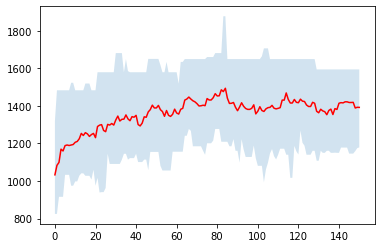

In [ ]:

all_logs_df = []


# this loops over logs 0-9, i.e. the 10 logs associate with POPSIZE=50. You can change it for other POPSIZE values
for j in  range(10,19):
    logbook = all_logs[j]  # extract the relacant logbook 
    data_1 = [[i for i in item.values()] for item in logbook]  # this creates a list [0,1,2...n] where n is the length of the log book - it is need for creating the x-axis when plotting
    header = list(logbook.header)
    df = pd.DataFrame(data_1, columns=header)  # turn the logbook into a dataframe as its easier to work with
    all_logs_df.append(df) # add the log a list of dataframes
       
       
df_result = pd.concat(all_logs_df)   # this makes one dataframe from the 10 separate ones we created above

#calculate the mean value of the 10 best results ("max") found at every generation in every run [i,e from 10 values]
#repeat to calculate the "minimum" value of the 10 best results at each generation
#repeat to calculate the "maximum" value of the 10 best results at each generation

max_mean=df_result['max'].groupby(df_result['gen']).apply(np.mean) # look at the max column, group results by "gen", and apply the relevant statistic
max_max=df_result['max'].groupby(df_result['gen']).apply(np.max)
max_min=df_result['max'].groupby(df_result['gen']).apply(np.min)


#plot convergence curves for data of choice

x = [i for i in range(0,151)]  # make sure this is set to NGEN+1 ... it creates a list [0,1,2,....NGEN] used to define the x-axis for plotting
fig, ax = plt.subplots()
# plot the mean value of the best result per generation
ax.plot(max_mean, color='red')
# not plot the max and min value of the best result per generation and shade to show the variance per run
ax.fill_between(x,max_min, max_max, alpha=0.2)

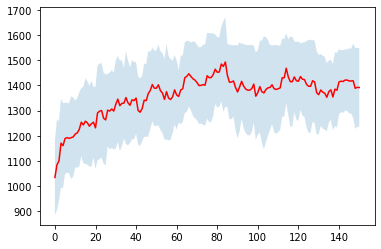

In [ ]:

# show std instead of min/max variation
max_std=df_result['max'].groupby(df_result['gen']).apply(np.std)    # calculate standard dev of the values from each of the runs at each generation of the runs

max_max = max_mean+max_std
max_min = max_mean-max_std

x = [i for i in range(0,151)]  # make sure this is set to NGEN+1 ... it creates a list [0,1,2,....NGEN] used to define the x-axis for plotting
fig, ax = plt.subplots()
# plot the mean value of the best result per generation
ax.plot(max_mean, color='red')
# not plot the max and min value of the best result per generation and shade to show the variance per run
ax.fill_between(x,max_min, max_max, alpha=0.2)


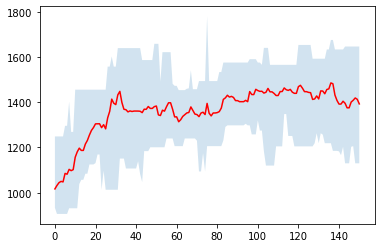

In [ ]:
all_logs_df = []


# this loops over logs 0-9, i.e. the 10 logs associate with POPSIZE=50. You can change it for other POPSIZE values
for j in  range(0,9):
    logbook = all_logs[j]  # extract the relacant logbook 
    data_1 = [[i for i in item.values()] for item in logbook]  # this creates a list [0,1,2...n] where n is the length of the log book - it is need for creating the x-axis when plotting
    header = list(logbook.header)
    df = pd.DataFrame(data_1, columns=header)  # turn the logbook into a dataframe as its easier to work with
    all_logs_df.append(df) # add the log a list of dataframes
       
       
df_result = pd.concat(all_logs_df)   # this makes one dataframe from the 10 separate ones we created above

#calculate the mean value of the 10 best results ("max") found at every generation in every run [i,e from 10 values]
#repeat to calculate the "minimum" value of the 10 best results at each generation
#repeat to calculate the "maximum" value of the 10 best results at each generation

max_mean=df_result['max'].groupby(df_result['gen']).apply(np.mean) # look at the max column, group results by "gen", and apply the relevant statistic
max_max=df_result['max'].groupby(df_result['gen']).apply(np.max)
max_min=df_result['max'].groupby(df_result['gen']).apply(np.min)


#plot convergence curves for data of choice

x = [i for i in range(0,151)]  # make sure this is set to NGEN+1 ... it creates a list [0,1,2,....NGEN] used to define the x-axis for plotting
fig, ax = plt.subplots()
# plot the mean value of the best result per generation
ax.plot(max_mean, color='red')
# not plot the max and min value of the best result per generation and shade to show the variance per run
ax.fill_between(x,max_min, max_max, alpha=0.2)

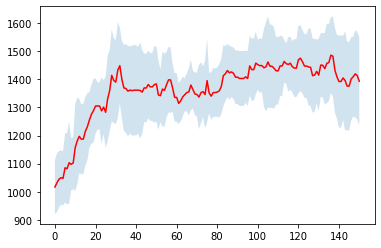

In [ ]:

# show std instead of min/max variation
max_std=df_result['max'].groupby(df_result['gen']).apply(np.std)    # calculate standard dev of the values from each of the runs at each generation of the runs

max_max = max_mean+max_std
max_min = max_mean-max_std

x = [i for i in range(0,151)]  # make sure this is set to NGEN+1 ... it creates a list [0,1,2,....NGEN] used to define the x-axis for plotting
fig, ax = plt.subplots()
# plot the mean value of the best result per generation
ax.plot(max_mean, color='red')
# not plot the max and min value of the best result per generation and shade to show the variance per run
ax.fill_between(x,max_min, max_max, alpha=0.2)


           popsize  fitness  genMaxFound  crossoever  mutation
selection                                                     
2             20.0  1632.14        88.68         0.5       0.3
4             20.0  1641.60        94.18         0.5       0.3
6             20.0  1635.74        90.90         0.5       0.3
8             20.0  1604.06        89.66         0.5       0.3
10            20.0  1626.86        94.32         0.5       0.3
12            20.0  1624.90        92.12         0.5       0.3
14            20.0  1599.58        84.40         0.5       0.3
16            20.0  1636.96        90.76         0.5       0.3
18            20.0  1630.08        93.38         0.5       0.3
20            20.0  1633.24        80.70         0.5       0.3
           popsize  fitness  genMaxFound  crossoever  mutation
selection                                                     
2             20.0   1616.0         93.0         0.5       0.3
4             20.0   1623.5         96.5         0.5   

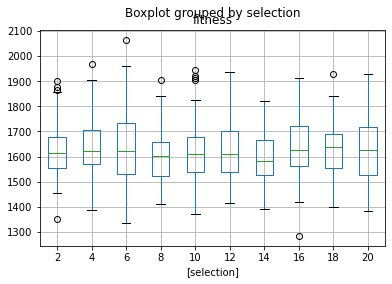

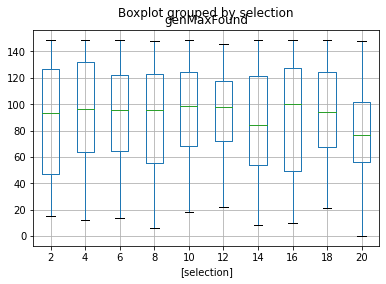

In [ ]:
# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
print(df_Bests.groupby('selection').mean())

#  you can calculate other statistics such as median, std if you want
print(df_Bests.groupby('selection').median())
print(df_Bests.groupby('selection').std())

# plot the boxplot of best fitness per population size
boxplot = df_Bests.boxplot(column=['fitness'], by=['selection'])

# plot genMaxFound per population size
boxplot = df_Bests.boxplot(column=['genMaxFound'], by=['selection'])

          popsize      fitness  genMaxFound  crossoever  selection  evaluate
mutation                                                                    
0.3          20.0  1659.493333         98.4         0.5       20.0       1.0
          popsize  fitness  genMaxFound  crossoever  selection  evaluate
mutation                                                                
0.3          20.0   1622.0        110.5         0.5       20.0       1.0
          popsize     fitness  genMaxFound  crossoever  selection  evaluate
mutation                                                                   
0.3           0.0  174.940364    40.909132         0.0        0.0  0.819232


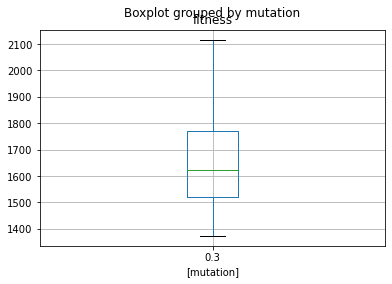

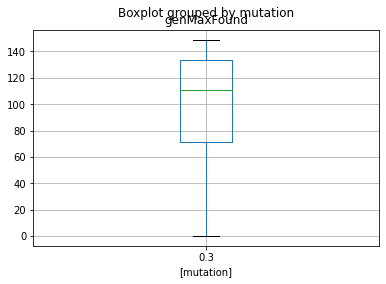

In [70]:
# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
print(df_Bests.groupby('mutation').mean())

#  you can calculate other statistics such as median, std if you want
print(df_Bests.groupby('mutation').median())
print(df_Bests.groupby('mutation').std())

# plot the boxplot of best fitness per population size
boxplot = df_Bests.boxplot(column=['fitness'], by=['mutation'])

# plot genMaxFound per population size
boxplot = df_Bests.boxplot(column=['genMaxFound'], by=['mutation'])



##  Statistics
If we want to apply statistical tests, we need to extract the relevant data as lists - see the code below. Refer to the lecture for interpreting the statistical value. Based on the value - can we reject the null hpyothesis "**changing the population size from 50 to 150 has no effect on performance**"

In [ ]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_Bests.genMaxFound[df_Bests.selection == 6]
p150= df_Bests.genMaxFound[df_Bests.selection == 20]
#p100= df_Bests.fitness[df_Bests.crossoever == 0.8999999999999999]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p1000l = p100.tolist()
# check for normality
stat,p = shapiro(p50l)
print('p=20: normality p=%f' %(p))

if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probablyno  Gaussian (not normal distribution)")
    
stat,p = shapiro(p150l)
print('p=40: normality p=%f' %(p))
if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probably not Gaussian (not normal distribution)")

# stat,p = shapiro(p1000l)
# print('p=40: normality p=%f' %(p))
# if p>0.05:
#     print("Probably Gaussian (normal distribution)")
# else:
#     print("Probably not Gaussian (not normal distribution)")



p=20: normality p=0.059969
Probably Gaussian (normal distribution)
p=40: normality p=0.320244
Probably Gaussian (normal distribution)


In [ ]:
#now apply the  appropriate statistical test depending on the result of the above
stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
#stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed

print('p=%f' %(p))
if p<0.05:
    print("Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("Cannot reject null hypothesis - no significant difference")

p=0.167051
Cannot reject null hypothesis - no significant difference


p=20: normality p=0.058641
Probably Gaussian (normal distribution)
p=40: normality p=0.216540
Probably Gaussian (normal distribution)
p=0.000000
Reject null hypothesis - there is a significant difference in the experiments
p=20: normality p=0.000992
Probably not  Gaussian (not normal distribution)
p=40: normality p=0.120388
Probably Gaussian (normal distribution)
p=0.016402
Reject null hypothesis - there is a significant difference in the experiments
         fitness  genMaxFound  crossoever  mutation  selection
popsize                                                       
20       1552.72        94.22         0.5       0.3       40.0
40       1308.54        74.96         0.5       0.3       40.0
         fitness  genMaxFound  crossoever  mutation  selection
popsize                                                       
20        1550.0         96.5         0.5       0.3       40.0
40        1295.5         79.5         0.5       0.3       40.0
            fitness  genMaxFound  crossoe

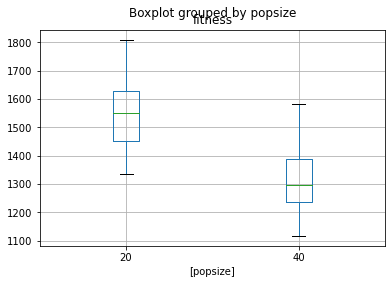

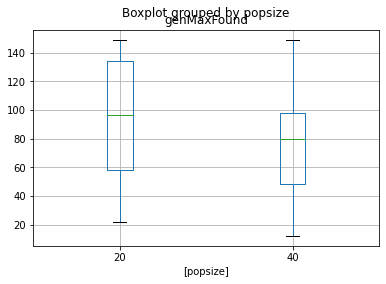

In [ ]:
import pandas as pd
# with open('all_logs_experiment_1_t5_population.csv', newline='') as f:
#     reader = csv.reader(f)
#     all_logs_experiment_1_t5 = list(reader)
# all_logs_df = []


# # this loops over logs 0-9, i.e. the 10 logs associate with POPSIZE=50. You can change it for other POPSIZE values
# for j in  range(0,9):
#     logbook = all_logs_experiment_1_t5[j]  # extract the relacant logbook 
#     data_1 = [[i for i in item.values()] for item in logbook]  # this creates a list [0,1,2...n] where n is the length of the log book - it is need for creating the x-axis when plotting
#     header = list(logbook.header)
#     df = pd.DataFrame(data_1, columns=header)  # turn the logbook into a dataframe as its easier to work with
#     all_logs_df.append(df) # add the log a list of dataframes
       
       
# df_result = pd.concat(all_logs_df)   # this makes one dataframe from the 10 separate ones we created above

# #calculate the mean value of the 10 best results ("max") found at every generation in every run [i,e from 10 values]
# #repeat to calculate the "minimum" value of the 10 best results at each generation
# #repeat to calculate the "maximum" value of the 10 best results at each generation

# max_mean=df_result['max'].groupby(df_result['gen']).apply(np.mean) # look at the max column, group results by "gen", and apply the relevant statistic
# max_max=df_result['max'].groupby(df_result['gen']).apply(np.max)
# max_min=df_result['max'].groupby(df_result['gen']).apply(np.min)


# #plot convergence curves for data of choice

# x = [i for i in range(0,151)]  # make sure this is set to NGEN+1 ... it creates a list [0,1,2,....NGEN] used to define the x-axis for plotting
# fig, ax = plt.subplots()
# # plot the mean value of the best result per generation
# ax.plot(max_mean, color='red')
# # not plot the max and min value of the best result per generation and shade to show the variance per run
# ax.fill_between(x,max_min, max_max, alpha=0.2)


df_bests_5 = pd.read_csv("df_bests_5")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# Fitness
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_5.fitness[df_bests_5.popsize == 20]
p150= df_bests_5.fitness[df_bests_5.popsize == 40]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()

# check for normality
stat,p = shapiro(p50l)
print('p=20: normality p=%f' %(p))

if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probablyno  Gaussian (not normal distribution)")
    
stat,p = shapiro(p150l)
print('p=40: normality p=%f' %(p))
if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probably not Gaussian (not normal distribution)")
#now apply the  appropriate statistical test depending on the result of the above
stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
#stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed

print('p=%f' %(p))
if p<0.05:
    print("Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("Cannot reject null hypothesis - no significant difference")

# Fitness Generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_5.genMaxFound[df_bests_5.popsize == 20]
p150= df_bests_5.genMaxFound[df_bests_5.popsize == 40]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()

# check for normality
stat,p = shapiro(p50l)
print('p=20: normality p=%f' %(p))

if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probably not  Gaussian (not normal distribution)")
    
stat,p = shapiro(p150l)
print('p=40: normality p=%f' %(p))
if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probably not Gaussian (not normal distribution)")
#now apply the  appropriate statistical test depending on the result of the above
stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
#stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed

print('p=%f' %(p))
if p<0.05:
    print("Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("Cannot reject null hypothesis - no significant difference")

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
print(df_bests_5.groupby('popsize').mean())

#  you can calculate other statistics such as median, std if you want
print(df_bests_5.groupby('popsize').median())
print(df_bests_5.groupby('popsize').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_5.boxplot(column=['fitness'], by=['popsize'])

# plot genMaxFound per population size
boxplot = df_bests_5.boxplot(column=['genMaxFound'], by=['popsize'])


In [ ]:
import pandas as pd
# with open('all_logs_experiment_1_t5_population.csv', newline='') as f:
#     reader = csv.reader(f)
#     all_logs_experiment_1_t5 = list(reader)
# all_logs_df = []


# # this loops over logs 0-9, i.e. the 10 logs associate with POPSIZE=50. You can change it for other POPSIZE values
# for j in  range(0,9):
#     logbook = all_logs_experiment_1_t5[j]  # extract the relacant logbook 
#     data_1 = [[i for i in item.values()] for item in logbook]  # this creates a list [0,1,2...n] where n is the length of the log book - it is need for creating the x-axis when plotting
#     header = list(logbook.header)
#     df = pd.DataFrame(data_1, columns=header)  # turn the logbook into a dataframe as its easier to work with
#     all_logs_df.append(df) # add the log a list of dataframes
       
       
# df_result = pd.concat(all_logs_df)   # this makes one dataframe from the 10 separate ones we created above

# #calculate the mean value of the 10 best results ("max") found at every generation in every run [i,e from 10 values]
# #repeat to calculate the "minimum" value of the 10 best results at each generation
# #repeat to calculate the "maximum" value of the 10 best results at each generation

# max_mean=df_result['max'].groupby(df_result['gen']).apply(np.mean) # look at the max column, group results by "gen", and apply the relevant statistic
# max_max=df_result['max'].groupby(df_result['gen']).apply(np.max)
# max_min=df_result['max'].groupby(df_result['gen']).apply(np.min)


# #plot convergence curves for data of choice

# x = [i for i in range(0,151)]  # make sure this is set to NGEN+1 ... it creates a list [0,1,2,....NGEN] used to define the x-axis for plotting
# fig, ax = plt.subplots()
# # plot the mean value of the best result per generation
# ax.plot(max_mean, color='red')
# # not plot the max and min value of the best result per generation and shade to show the variance per run
# ax.fill_between(x,max_min, max_max, alpha=0.2)


df_bests_5 = pd.read_csv("df_bests_5")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# Fitness
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_5.fitness[df_bests_5.popsize == 20]
p150= df_bests_5.fitness[df_bests_5.popsize == 40]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()

# check for normality
stat,p = shapiro(p50l)
print('p=20: normality p=%f' %(p))

if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probablyno  Gaussian (not normal distribution)")
    
stat,p = shapiro(p150l)
print('p=40: normality p=%f' %(p))
if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probably not Gaussian (not normal distribution)")
#now apply the  appropriate statistical test depending on the result of the above
stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
#stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed

print('p=%f' %(p))
if p<0.05:
    print("Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("Cannot reject null hypothesis - no significant difference")

# Fitness Generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_5.genMaxFound[df_bests_5.popsize == 20]
p150= df_bests_5.genMaxFound[df_bests_5.popsize == 40]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()

# check for normality
stat,p = shapiro(p50l)
print('p=20: normality p=%f' %(p))

if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probably not  Gaussian (not normal distribution)")
    
stat,p = shapiro(p150l)
print('p=40: normality p=%f' %(p))
if p>0.05:
    print("Probably Gaussian (normal distribution)")
else:
    print("Probably not Gaussian (not normal distribution)")
#now apply the  appropriate statistical test depending on the result of the above
stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
#stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed

print('p=%f' %(p))
if p<0.05:
    print("Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("Cannot reject null hypothesis - no significant difference")

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
print(df_bests_5.groupby('popsize').mean())

#  you can calculate other statistics such as median, std if you want
print(df_bests_5.groupby('popsize').median())
print(df_bests_5.groupby('popsize').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_5.boxplot(column=['fitness'], by=['popsize'])

# plot genMaxFound per population size
boxplot = df_bests_5.boxplot(column=['genMaxFound'], by=['popsize'])


# Below is code for experiment 1 - population

popsize == 20 and popsize == 40 [fitness] Reject null hypothesis - there is a significant difference in the experiments
popsize == 20 and popsize == 60 [fitness] Reject null hypothesis - there is a significant difference in the experiments
popsize == 40 and popsize == 60 [fitness]Cannot reject null hypothesis - no significant difference
popsize == 20 and popsize == 40 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments
popsize == 20 and popsize == 60 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments
popsize == 40 and popsize == 60 [genMaxFound]Cannot reject null hypothesis - no significant difference


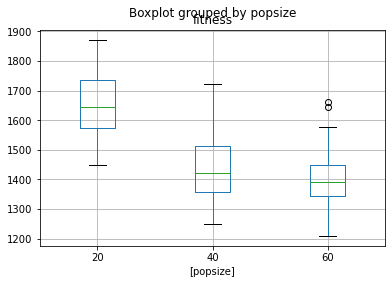

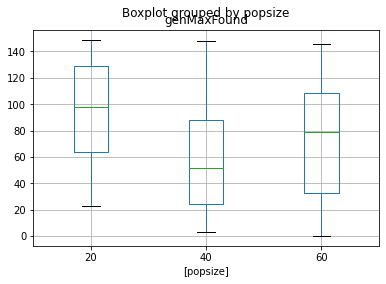

In [ ]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_14_population")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.popsize == 20]
p150= df_bests_9.fitness[df_bests_9.popsize == 40]
p100= df_bests_9.fitness[df_bests_9.popsize == 60]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('popsize == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")
p_fitness = False
p1_fitness = False
p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("popsize == 20 and popsize == 40 [fitness] have different distributions")
if p50normality and p100normality:
    stat1,p1_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l)
    print("popsize == 20 and popsize == 60 [fitness] have different distributions")
if p150normality and p100normality:
    stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l)
    print("popsize == 40 and popsize == 60 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("popsize == 20 and popsize == 40 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("popsize == 20 and popsize == 40 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1_fitness))
if p1_fitness != False and p1_fitness<0.05:
    print("popsize == 20 and popsize == 60 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("popsize == 20 and popsize == 60 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2_fitness))
if p2_fitness != False and p2_fitness<0.05:
    print("popsize == 40 and popsize == 60 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("popsize == 40 and popsize == 60 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.popsize == 20]
p150= df_bests_9.genMaxFound[df_bests_9.popsize == 40]
p100= df_bests_9.genMaxFound[df_bests_9.popsize == 60]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('popsize == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")
p2_gen = False
p_gen = False
p1_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("popsize == 20 and popsize == 40 [gen] have different distributions")
if p50normality and p100normality:
    stat1,p1_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p50l,p100l)
    print("popsize == 20 and popsize == 60 [gen] have different distributions")
if p150normality and p100normality:
    stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_gen = mannwhitneyu(p150l,p100l)
    print("popsize == 40 and popsize == 60 [gen] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_gen))
if p_gen != False and p_gen<0.05:
    print("popsize == 20 and popsize == 40 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("popsize == 20 and popsize == 40 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1_gen))
if p1_gen != False and p1_gen<0.05:
    print("popsize == 20 and popsize == 60 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("popsize == 20 and popsize == 60 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2_gen))
if p2_gen != False and p2_gen<0.05:
    print("popsize == 40 and popsize == 60 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
else:
    print("popsize == 40 and popsize == 60 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('popsize').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('popsize').median())
#print(df_bests_9.groupby('popsize').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['popsize'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['popsize'])


# Below is experiment 2 for mutation

mutation == 0.3 [fitness]: Probably not  Gaussian (not normal distribution)
mutation == 0.6 [fitness]: Probably Gaussian (normal distribution)
mutation == 0.8999999999999999 [fitness]: Probably Gaussian (normal distribution)
Mean
          popsize  fitness  genMaxFound  crossoever  selection
mutation                                                      
0.3          20.0  1631.76        93.90         0.5       20.0
0.6          20.0  1542.72        70.38         0.5       20.0
0.9          20.0  1542.78        74.58         0.5       20.0
Median
          popsize  fitness  genMaxFound  crossoever  selection
mutation                                                      
0.3          20.0   1631.0         99.5         0.5       20.0
0.6          20.0   1535.5         60.0         0.5       20.0
0.9          20.0   1539.5         69.0         0.5       20.0
mutation == 0.3 and mutation == 0.6 [fitness] have different distributions
mutation == 0.3 and mutation == 0.8999999999999999 [fitnes

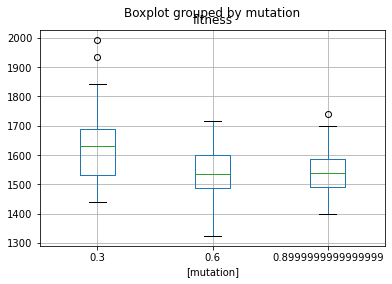

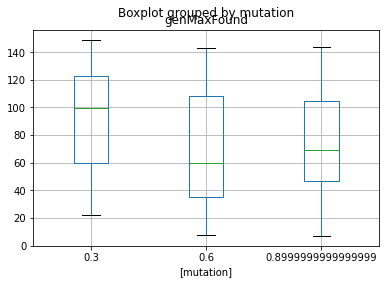

In [ ]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_15_mutation")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.mutation == 0.3]
p150= df_bests_9.fitness[df_bests_9.mutation == 0.6]
p100= df_bests_9.fitness[df_bests_9.mutation == 0.8999999999999999]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 0.3: normality p=%f' %(p))

p50normality = False
if p>0.05:
    print("mutation == 0.3 [fitness]: Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    print("mutation == 0.3 [fitness]: Probably not  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    print("mutation == 0.6 [fitness]: Probably Gaussian (normal distribution)")
else:
    p150normality = False
    print("mutation == 0.6 [fitness]: Probably not Gaussian (not normal distribution)")
p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    print("mutation == 0.8999999999999999 [fitness]: Probably Gaussian (normal distribution)")
else:
    p100normality = False
    print("mutation == 0.8999999999999999 [fitness]: Probably not Gaussian (not normal distribution)")

print("Mean")
print(df_bests_9.groupby('mutation').mean())
print("Median")
print(df_bests_9.groupby('mutation').median())

p_fitness = False
p1_fitness = False
p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    #print("Median")
    #print(df_bests_9.groupby('mutation').median())
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("mutation == 0.3 and mutation == 0.6 [fitness] have different distributions")
if p50normality and p100normality:
    #print("Mean")
    #print(df_bests_9.groupby('mutation').mean())
    stat1,p1_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    #print("Median")
    #print(df_bests_9.groupby('mutation').median())
    stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    #print("Median")
    #print(df_bests_9.groupby('mutation').median())
    stat1,p1_fitness = mannwhitneyu(p50l,p100l)
    print("mutation == 0.3 and mutation == 0.8999999999999999 [fitness] have different distributions")
if p150normality and p100normality:
    #print("Mean")
    #print(df_bests_9.groupby('mutation').mean())
    stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    #print("Median")
    #print(df_bests_9.groupby('mutation').median())
    stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    #print("Median")
    #print(df_bests_9.groupby('mutation').median())
    stat1,p2_fitness = mannwhitneyu(p150l,p100l)
    print("mutation == 0.6 and mutation == 0.8999999999999999 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("mutation == 0.3 and mutation == 0.6 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("mutation == 0.3 and mutation == 0.6 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
if p1_fitness != False and p1_fitness<0.05:
    print("mutation == 0.3 and mutation == 0.8999999999999999 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_fitness != False and p1_fitness>0.05:
    print("mutation == 0.3 and mutation == 0.8999999999999999 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_fitness != False and p2_fitness<0.05:
    print("mutation == 0.6 and mutation == 0.8999999999999999 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_fitness != False and p2_fitness>0.05:
    print("mutation == 0.6 and mutation == 0.8999999999999999 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.mutation == 0.3]
p150= df_bests_9.genMaxFound[df_bests_9.mutation == 0.6]
p100= df_bests_9.genMaxFound[df_bests_9.mutation == 0.8999999999999999]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

p50normality = False
if p>0.05:
    print("mutation == 0.3 [gen]: Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    print("mutation == 0.3 [gen]: Probably not  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    print("mutation == 0.6 [gen]: Probably Gaussian (normal distribution)")
else:
    p150normality = False
    print("mutation == 0.6 [gen]: Probably not Gaussian (not normal distribution)")
p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    print("mutation == 0.8999999999999999 [gen]: Probably Gaussian (normal distribution)")
else:
    p100normality = False
    print("mutation == 0.8999999999999999 [gen]: Probably not Gaussian (not normal distribution)")

p_gen = False
p1_gen = False
p2_gen = False

if p50normality and p150normality:
    #print(df_bests_9.groupby('mutation').mean())
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    #print("mutation == 0.3 and mutation == 0.6 [gen] have different distributions")
if p50normality and p100normality:
    #print(df_bests_9.groupby('mutation').mean())
    stat1,p1_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p50l,p100l)
    #print("mutation == 0.3 and mutation == 0.8999999999999999 [gen] have different distributions")
if p150normality and p100normality:
    #print(df_bests_9.groupby('mutation').mean())
    stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    #print(df_bests_9.groupby('mutation').median())
    stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    #print(df_bests_9.groupby('mutation').median())
    stat1,p2_gen = mannwhitneyu(p150l,p100l)
    #print("mutation == 0.6 and mutation == 0.8999999999999999 [gen] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and  p_gen<0.05:
    print("mutation == 0.3 and mutation == 0.6 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("mutation == 0.3 and mutation == 0.6 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
if p1_gen != False and p1_gen<0.05:
    print("mutation == 0.3 and mutation == 0.8999999999999999 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_gen != False and p1_gen>0.05:
    print("mutation == 0.3 and mutation == 0.8999999999999999 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_gen != False and p2_gen<0.05:
    print("mutation == 0.6 and mutation == 0.8999999999999999 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_gen != False and p2_gen>0.05:
    print("mutation == 0.6 and mutation == 0.8999999999999999 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('mutation').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('mutation').median())
#print(df_bests_9.groupby('mutation').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['mutation'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['mutation'])


# Below is code for experiment 3 - crossover

crossoever == 0.5: normality p=0.191676
crossoever == 0.5 and crossoever == 0.75 [fitness] Cannot reject null hypothesis - no significant difference
crossoever == 0.5 and crossoever == 1.0 [fitness] Cannot reject null hypothesis - no significant difference
crossoever == 0.75 and crossoever == 1.0 [fitness]Cannot reject null hypothesis - no significant difference
crossoever == 0.5 and crossoever == 1.0 have different distributions
crossoever == 0.75 and crossoever == 1.0 have different distributions
crossoever == 0.5 and crossoever == 0.75 [genMaxFound] Cannot reject null hypothesis - no significant difference
crossoever == 0.5 and crossoever == 1.0 [genMaxFound] Cannot reject null hypothesis - no significant difference
crossoever == 0.75 and crossoever == 1.0 [genMaxFound]Cannot reject null hypothesis - no significant difference


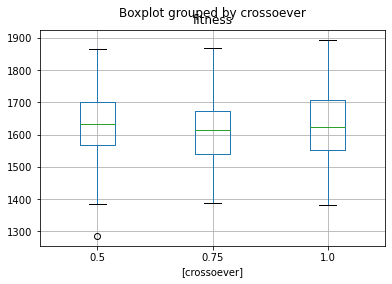

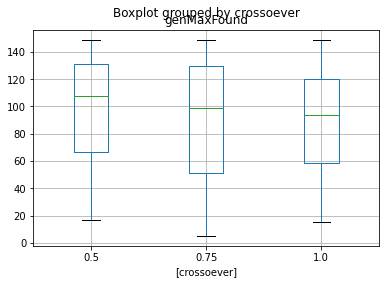

In [ ]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_16_crossover")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.crossoever == 0.5]
p150= df_bests_9.fitness[df_bests_9.crossoever == 0.75]
p100= df_bests_9.fitness[df_bests_9.crossoever == 1.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 0.3: normality p=%f' %(p))

p50normality = False
if p>0.05:
    print("crossoever == 0.5 [fitness]: Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    print("crossoever == 0.5 [fitness]: Probably not  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    print("crossoever == 0.75 [fitness]: Probably Gaussian (normal distribution)")
else:
    p150normality = False
    print("crossoever == 0.75 [fitness]: Probably not Gaussian (not normal distribution)")
p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    print("crossoever == 1.0 [fitness]: Probably Gaussian (normal distribution)")
else:
    p100normality = False
    print("crossoever == 1.0 [fitness]: Probably not Gaussian (not normal distribution)")

print("Mean")
print(df_bests_9.groupby('crossoever').mean())
print("Median")
print(df_bests_9.groupby('mutation').median())

p_fitness = False
p1_fitness = False
p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("crossoever == 0.5 and crossoever == 0.75 [fitness] have different distributions")
if p50normality and p100normality:
    stat1,p1_fitness = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l)
    print("crossoever == 0.5 and crossoever == 1.0 [fitness] have different distributions")
if p150normality and p100normality:
    stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l)
    print("crossoever == 0.75 and crossoever == 1.0 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("crossoever == 0.5 and crossoever == 0.75 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("crossoever == 0.5 and crossoever == 0.75 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1_fitness))
if p1_fitness != False and p1_fitness<0.05:
    print("crossoever == 0.5 and crossoever == 1.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_fitness != False and p1_fitness>0.05:
    print("crossoever == 0.5 and crossoever == 1.0 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_fitness != False and p2_fitness<0.05:
    print("crossoever == 0.75 and crossoever == 1.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_fitness != False and p2_fitness>0.05:
    print("crossoever == 0.75 and crossoever == 1.0 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.crossoever == 0.5]
p150= df_bests_9.genMaxFound[df_bests_9.crossoever == 0.75]
p100= df_bests_9.genMaxFound[df_bests_9.crossoever == 1.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")

p_gen = False
p1_gen = False
p2_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("crossoever == 0.5 and crossoever == 0.75 have different distributions")
if p50normality and p100normality:
    stat1,p1_gen = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p50l,p100l)
    print("crossoever == 0.5 and crossoever == 1.0 have different distributions")
if p150normality and p100normality:
    stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_gen = mannwhitneyu(p150l,p100l)
    print("crossoever == 0.75 and crossoever == 1.0 have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and p_gen<0.05:
    print("crossoever == 0.5 and crossoever == 0.75 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("crossoever == 0.5 and crossoever == 0.75 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
if p1_gen != False and p1_gen<0.05:
    print("crossoever == 0.5 and crossoever == 1.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_gen != False and p_gen>0.05:
    print("crossoever == 0.5 and crossoever == 1.0 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_gen != False and p2_gen<0.05:
    print("crossoever == 0.75 and crossoever == 1.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_gen != False and p_gen>0.05:
    print("crossoever == 0.75 and crossoever == 1.0 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('crossoever').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('crossoever').median())
#print(df_bests_9.groupby('crossoever').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['crossoever'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['crossoever'])


crossoever == 0.5 [fitness]: Probably Gaussian (normal distribution)
crossoever == 0.75 [fitness]: Probably not Gaussian (not normal distribution)
crossoever == 0.5 and crossoever == 0.75 [fitness] have different distributions
crossoever == 0.5 and crossoever == 0.75 [fitness] Reject null hypothesis - there is a significant difference in the experiments
crossoever == 0.5 and crossoever == 0.75 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments


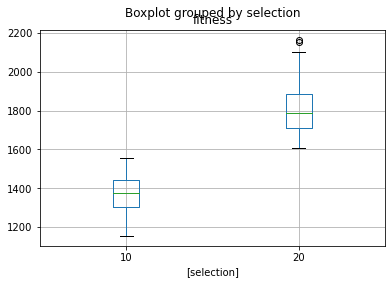

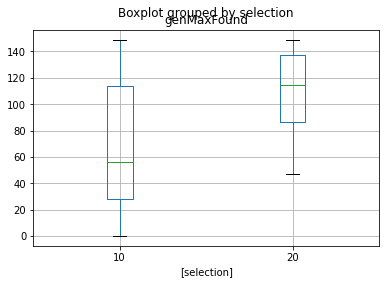

In [93]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_24_select")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.selection == 10]
p150= df_bests_9.fitness[df_bests_9.selection == 20]
#p100= df_bests_9.fitness[df_bests_9.crossoever == 1.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
#p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 0.3: normality p=%f' %(p))

p50normality = False
if p>0.05:
    print("crossoever == 0.5 [fitness]: Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    print("crossoever == 0.5 [fitness]: Probably not  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    print("crossoever == 0.75 [fitness]: Probably Gaussian (normal distribution)")
else:
    p150normality = False
    print("crossoever == 0.75 [fitness]: Probably not Gaussian (not normal distribution)")
# p100normality = False
# stat,p = shapiro(p100)
# #print('popsize == 20: normality p=%f' %(p))
# if p>0.05:
#     p100normality = True
#     print("crossoever == 1.0 [fitness]: Probably Gaussian (normal distribution)")
# else:
#     p100normality = False
#     print("crossoever == 1.0 [fitness]: Probably not Gaussian (not normal distribution)")


p_fitness = False
p1_fitness = False
p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("crossoever == 0.5 and crossoever == 0.75 [fitness] have different distributions")
# if p50normality and p100normality:
#     stat1,p1_fitness = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
# elif not p50normality and not p100normality:
#     stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# else:
#     stat1,p1_fitness = mannwhitneyu(p50l,p100l)
#     print("crossoever == 0.5 and crossoever == 1.0 [fitness] have different distributions")
# if p150normality and p100normality:
#     stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
# elif not p150normality and not p100normality:
#     stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
# else:
#     stat1,p2_fitness = mannwhitneyu(p150l,p100l)
#     print("crossoever == 0.75 and crossoever == 1.0 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("crossoever == 0.5 and crossoever == 0.75 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("crossoever == 0.5 and crossoever == 0.75 [fitness] Cannot reject null hypothesis - no significant difference")
# #print('p=%f' %(p1_fitness))
# if p1_fitness != False and p1_fitness<0.05:
#     print("crossoever == 0.5 and crossoever == 1.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
# elif p1_fitness != False and p1_fitness>0.05:
#     print("crossoever == 0.5 and crossoever == 1.0 [fitness] Cannot reject null hypothesis - no significant difference")
# #print('p=%f' %(p2))
# if p2_fitness != False and p2_fitness<0.05:
#     print("crossoever == 0.75 and crossoever == 1.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
# elif p2_fitness != False and p2_fitness>0.05:
#     print("crossoever == 0.75 and crossoever == 1.0 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.selection == 10]
p150= df_bests_9.genMaxFound[df_bests_9.selection == 20]
# p100= df_bests_9.genMaxFound[df_bests_9.crossoever == 1.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
# p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

# p100normality = False
# stat,p = shapiro(p100)
# #print('popsize == 20: normality p=%f' %(p))
# if p>0.05:
#     p100normality = True
#     #print("Probably Gaussian (normal distribution)")
# else:
#     p100normality = False
#     #print("Probably not Gaussian (not normal distribution)")

p_gen = False
p1_gen = False
p2_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("crossoever == 0.5 and crossoever == 0.75 have different distributions")
# if p50normality and p100normality:
#     stat1,p1_gen = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
# elif not p50normality and not p100normality:
#     stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# else:
#     stat1,p1_gen = mannwhitneyu(p50l,p100l)
#     print("crossoever == 0.5 and crossoever == 1.0 have different distributions")
# if p150normality and p100normality:
#     stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
# elif not p150normality and not p100normality:
#     stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
# else:
#     stat1,p2_gen = mannwhitneyu(p150l,p100l)
#     print("crossoever == 0.75 and crossoever == 1.0 have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and p_gen<0.05:
    print("crossoever == 0.5 and crossoever == 0.75 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("crossoever == 0.5 and crossoever == 0.75 [genMaxFound] Cannot reject null hypothesis - no significant difference")
# #print('p=%f' %(p1))
# if p1_gen != False and p1_gen<0.05:
#     print("crossoever == 0.5 and crossoever == 1.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
# elif p1_gen != False and p_gen>0.05:
#     print("crossoever == 0.5 and crossoever == 1.0 [genMaxFound] Cannot reject null hypothesis - no significant difference")
# #print('p=%f' %(p2))
# if p2_gen != False and p2_gen<0.05:
#     print("crossoever == 0.75 and crossoever == 1.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
# elif p2_gen != False and p_gen>0.05:
#     print("crossoever == 0.75 and crossoever == 1.0 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('crossoever').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('crossoever').median())
#print(df_bests_9.groupby('crossoever').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['selection'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['selection'])


# Below code is for experiment selection

selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and selection == 20.0 [fitness] Cannot reject null hypothesis - no significant difference
selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 6.666666666666667 and selection == 13.333333333333334 [gen] have different distributions
selection == 6.666666666666667 and selection == 20.0 [gen] have different distributions
selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference
selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant difference


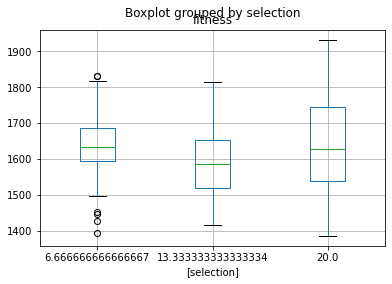

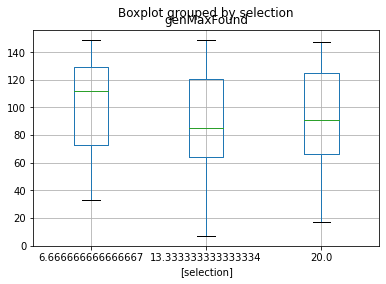

In [ ]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_17_selection")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.selection == 6.666666666666667]
p150= df_bests_9.fitness[df_bests_9.selection == 13.333333333333334]
p100= df_bests_9.fitness[df_bests_9.selection == 20.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('selection == 6.666666666666667: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")
p_fitness = False
p1_fitness = False
p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] have different distributions")
if p50normality and p100normality:
    stat1,p1_fitness = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] have different distributions")
if p150normality and p100normality:
    stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1_fitness))
if p1_fitness != False and p1_fitness<0.05:
    print("selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_fitness != False and p1_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_fitness != False and p2_fitness<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_fitness != False and p2_fitness>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.selection == 6.666666666666667]
p150= df_bests_9.genMaxFound[df_bests_9.selection == 13.333333333333334]
p100= df_bests_9.genMaxFound[df_bests_9.selection == 20.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")

p_gen = False
p1_gen = False
p2_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [gen] have different distributions")
if p50normality and p100normality:
    stat1,p1_gen = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [gen] have different distributions")
if p150normality and p100normality:
    stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_gen = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [gen] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and p_gen<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
if p1_gen != False and p1_gen<0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_gen != False and p1_gen>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_gen != False and p2_gen<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_gen != False and p2_gen>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('crossoever').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('crossoever').median())
#print(df_bests_9.groupby('crossoever').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['selection'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['selection'])


selection == 6.666666666666667 and selection == 20.0 [fitness] have different distributions
selection == 13.333333333333334 and selection == 20.0 [fitness] have different distributions
selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and selection == 20.0 [fitness] Cannot reject null hypothesis - no significant difference
selection == 13.333333333333334 and selection == 20.0 [fitness]Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference
selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant difference


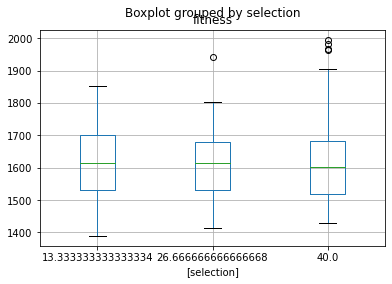

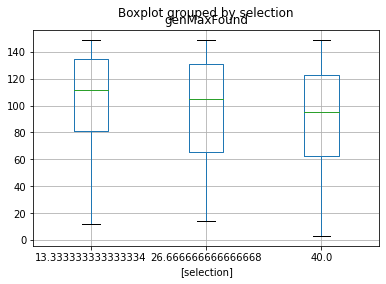

In [ ]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_18_selection_more_selection_than_population")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.selection == 13.333333333333334]
p150= df_bests_9.fitness[df_bests_9.selection == 26.666666666666668]
p100= df_bests_9.fitness[df_bests_9.selection == 40.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('selection == 6.666666666666667: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")
p_fitness = False
p1_fitness = False
p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] have different distributions")
if p50normality and p100normality:
    stat1,p1_fitness = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] have different distributions")
if p150normality and p100normality:
    stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1_fitness))
if p1_fitness != False and p1_fitness<0.05:
    print("selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_fitness != False and p1_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_fitness != False and p2_fitness<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_fitness != False and p2_fitness>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.selection == 13.333333333333334]
p150= df_bests_9.genMaxFound[df_bests_9.selection == 26.666666666666668]
p100= df_bests_9.genMaxFound[df_bests_9.selection == 40.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")

p_gen = False
p1_gen = False
p2_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [gen] have different distributions")
if p50normality and p100normality:
    stat1,p1_gen = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [gen] have different distributions")
if p150normality and p100normality:
    stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [gen] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and p_gen<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
if p1_gen != False and p1_gen<0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_gen != False and p1_gen>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_gen != False and p2_gen<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_gen != False and p2_gen>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('crossoever').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('crossoever').median())
#print(df_bests_9.groupby('crossoever').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['selection'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['selection'])


selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference
cost is 103.1 
total broken constraints: 1
total points: 1939
total cost is 103.1
selected players are [0, 1, 27, 162, 180, 200, 202, 340, 376, 383, 466]


(1, 1939)

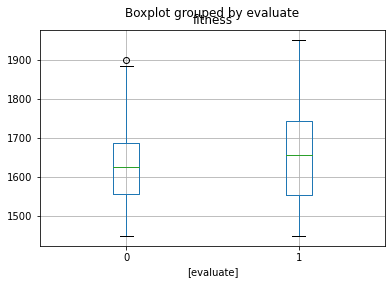

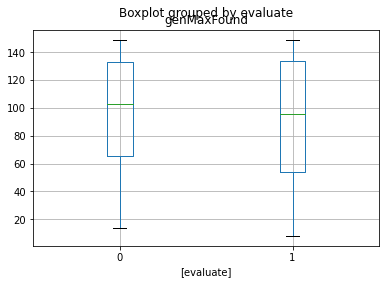

In [ ]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_20_evaluate")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.evaluate == 0]
p150= df_bests_9.fitness[df_bests_9.evaluate == 1]
#p100= df_bests_9.fitness[df_bests_9.selection == 40.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
#p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('selection == 6.666666666666667: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

# p100normality = False
# stat,p = shapiro(p100)
# #print('popsize == 20: normality p=%f' %(p))
# if p>0.05:
#     p100normality = True
#     #print("Probably Gaussian (normal distribution)")
# else:
#     p100normality = False
#     #print("Probably not Gaussian (not normal distribution)")
p_fitness = False
p1_fitness = False
#p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] have different distributions")
# if p50normality and p100normality:
#     stat1,p1_fitness = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
# elif not p50normality and not p100normality:
#     stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# else:
#     stat1,p1_fitness = mannwhitneyu(p50l,p100l)
#     print("selection == 6.666666666666667 and selection == 20.0 [fitness] have different distributions")
# if p150normality and p100normality:
#     stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
# elif not p150normality and not p100normality:
#     stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
# else:
#     stat1,p2_fitness = mannwhitneyu(p150l,p100l)
#     print("selection == 13.333333333333334 and selection == 20.0 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference")
# #print('p=%f' %(p1_fitness))
# if p1_fitness != False and p1_fitness<0.05:
#     print("selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
# elif p1_fitness != False and p1_fitness>0.05:
#     print("selection == 6.666666666666667 and selection == 20.0 [fitness] Cannot reject null hypothesis - no significant difference")
# #print('p=%f' %(p2))
# if p2_fitness != False and p2_fitness<0.05:
#     print("selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
# elif p2_fitness != False and p2_fitness>0.05:
#     print("selection == 13.333333333333334 and selection == 20.0 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.evaluate == 0]
p150= df_bests_9.genMaxFound[df_bests_9.evaluate == 1]
#p100= df_bests_9.genMaxFound[df_bests_9.selection == 40.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
#p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

# p100normality = False
# stat,p = shapiro(p100)
# #print('popsize == 20: normality p=%f' %(p))
# if p>0.05:
#     p100normality = True
#     #print("Probably Gaussian (normal distribution)")
# else:
#     p100normality = False
#     #print("Probably not Gaussian (not normal distribution)")

p_gen = False
#p1_gen = False
#p2_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [gen] have different distributions")
# if p50normality and p100normality:
#     stat1,p1_gen = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
# elif not p50normality and not p100normality:
#     stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# else:
#     stat1,p1_gen = mannwhitneyu(p50l,p100l)
#     print("selection == 6.666666666666667 and selection == 20.0 [gen] have different distributions")
# if p150normality and p100normality:
#     stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
# elif not p150normality and not p100normality:
#     stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
# else:
#     stat1,p1_gen = mannwhitneyu(p150l,p100l)
#     print("selection == 13.333333333333334 and selection == 20.0 [gen] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and p_gen<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
# if p1_gen != False and p1_gen<0.05:
#     print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
# elif p1_gen != False and p1_gen>0.05:
#     print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference")
# #print('p=%f' %(p2))
# if p2_gen != False and p2_gen<0.05:
#     print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
# elif p2_gen != False and p2_gen>0.05:
#     print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from the dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('crossoever').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('crossoever').median())
#print(df_bests_9.groupby('crossoever').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['evaluate'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['evaluate'])

individual =[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
check_constraints(individual)

selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] have different distributions
selection == 6.666666666666667 and selection == 20.0 [fitness] have different distributions
selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference
selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant diffe

(1, 1988)

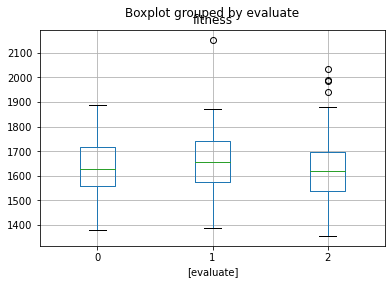

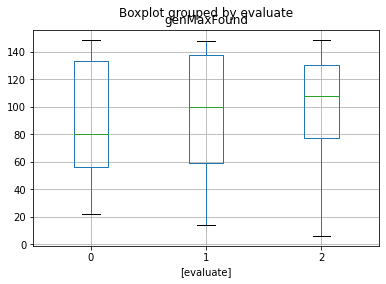

In [ ]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_21_evaluate")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.evaluate == 0]
p150= df_bests_9.fitness[df_bests_9.evaluate == 1]
p150= df_bests_9.fitness[df_bests_9.evaluate == 2]
#p100= df_bests_9.fitness[df_bests_9.selection == 40.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('selection == 6.666666666666667: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")
p_fitness = False
p1_fitness = False
#p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] have different distributions")
if p50normality and p100normality:
    stat1,p1_fitness = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] have different distributions")
if p150normality and p100normality:
    stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1_fitness))
if p1_fitness != False and p1_fitness<0.05:
    print("selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_fitness != False and p1_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_fitness != False and p2_fitness<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_fitness != False and p2_fitness>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.evaluate == 0]
p150= df_bests_9.genMaxFound[df_bests_9.evaluate == 1]
p100= df_bests_9.genMaxFound[df_bests_9.evaluate == 2]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")

p_gen = False
p1_gen = False
p2_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [gen] have different distributions")
if p50normality and p100normality:
    stat1,p1_gen = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [gen] have different distributions")
if p150normality and p100normality:
    stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [gen] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and p_gen<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
if p1_gen != False and p1_gen<0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_gen != False and p1_gen>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_gen != False and p2_gen<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_gen != False and p2_gen>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from tAhe dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('crossoever').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('crossoever').median())
#print(df_bests_9.groupby('crossoever').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['evaluate'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['evaluate'])

individual =[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
check_constraints(individual)

selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference
selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments
selection == 13.333333333333334 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments
cost is 109.8 
total broken constraints: 1
total points: 1988
total cost is 109.8
selected players are [2, 32, 40, 184, 185, 189, 2

(1, 1988)

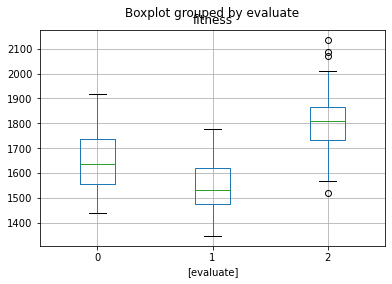

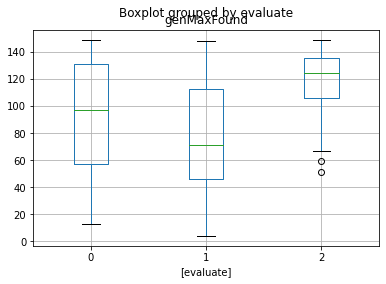

In [44]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_22_select")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.evaluate == 0]
p150= df_bests_9.fitness[df_bests_9.evaluate == 1]
p100= df_bests_9.fitness[df_bests_9.evaluate == 2]
#p100= df_bests_9.fitness[df_bests_9.selection == 40.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('selection == 6.666666666666667: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")
p_fitness = False
p1_fitness = False
#p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] have different distributions")
if p50normality and p100normality:
    stat1,p1_fitness = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] have different distributions")
if p150normality and p100normality:
    stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1_fitness))
if p1_fitness != False and p1_fitness<0.05:
    print("selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_fitness != False and p1_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_fitness != False and p2_fitness<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_fitness != False and p2_fitness>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.evaluate == 0]
p150= df_bests_9.genMaxFound[df_bests_9.evaluate == 1]
p100= df_bests_9.genMaxFound[df_bests_9.evaluate == 2]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")

p_gen = False
p1_gen = False
p2_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [gen] have different distributions")
if p50normality and p100normality:
    stat1,p1_gen = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [gen] have different distributions")
if p150normality and p100normality:
    stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [gen] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and p_gen<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
if p1_gen != False and p1_gen<0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_gen != False and p1_gen>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_gen != False and p2_gen<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_gen != False and p2_gen>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from tAhe dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('crossoever').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('crossoever').median())
#print(df_bests_9.groupby('crossoever').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['evaluate'])

# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['evaluate'])

individual =[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
check_constraints(individual)

selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] have different distributions
selection == 13.333333333333334 and selection == 20.0 [fitness] have different distributions
selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments
selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments
selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments
selection == 13.333333333333334 and selection == 20.0 [gen

([<matplotlib.axis.XTick at 0x206948262b0>,
 [Text(1, 0, 'Stochastic Universal Sampling '),
  Text(2, 0, 'Roulette'),
  Text(3, 0, 'Tournament')])

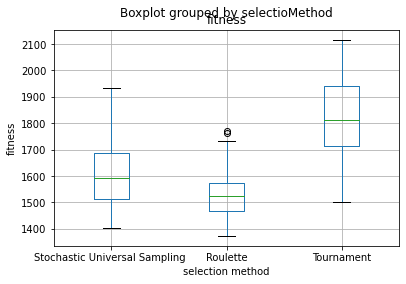

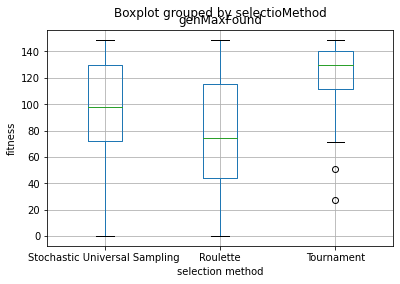

In [87]:
import pandas as pd


df_bests_9 = pd.read_csv("df_bests_23_select")
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import shapiro # test for normallity

# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.fitness[df_bests_9.selectioMethod == 0]
p150= df_bests_9.fitness[df_bests_9.selectioMethod == 1]
p100= df_bests_9.fitness[df_bests_9.selectioMethod == 2]
#p100= df_bests_9.fitness[df_bests_9.selection == 40.0]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('selection == 6.666666666666667: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")
p_fitness = False
p1_fitness = False
#p2_fitness = False
if p50normality and p150normality:
    stat,p_fitness = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_fitness = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_fitness = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] have different distributions")
if p50normality and p100normality:
    stat1,p1_fitness = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_fitness = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] have different distributions")
if p150normality and p100normality:
    stat1,p2_fitness = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p2_fitness = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p_fitness))
if p_fitness != False and p_fitness<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p_fitness != False and p_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1_fitness))
if p1_fitness != False and p1_fitness<0.05:
    print("selection == 6.666666666666667 and cselection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_fitness != False and p1_fitness>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [fitness] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_fitness != False and p2_fitness<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_fitness != False and p2_fitness>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [fitness]Cannot reject null hypothesis - no significant difference")

# Fitness generation
# select two subsets of fitness data, one where popsize = 50 and the other where popsize = 150
p50 = df_bests_9.genMaxFound[df_bests_9.selectioMethod == 0]
p150= df_bests_9.genMaxFound[df_bests_9.selectioMethod == 1]
p100= df_bests_9.genMaxFound[df_bests_9.selectioMethod == 2]
# we need to convert these subsets to lists to pass to the statistics functions
p50l= p50.tolist()
p150l = p150.tolist()
p100l = p100.tolist()

# check for normality
stat,p = shapiro(p50l)
#print('mutation == 20: normality p=%f' %(p))

p50normality = False
if p>0.05:
    #print("Probably Gaussian (normal distribution)")
    p50normality = True
else:
    p50normality = False
    #print("Probablyno  Gaussian (not normal distribution)")

p150normality = False 
stat,p = shapiro(p150l)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p150normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p150normality = False
    #print("Probably not Gaussian (not normal distribution)")

p100normality = False
stat,p = shapiro(p100)
#print('popsize == 20: normality p=%f' %(p))
if p>0.05:
    p100normality = True
    #print("Probably Gaussian (normal distribution)")
else:
    p100normality = False
    #print("Probably not Gaussian (not normal distribution)")

p_gen = False
p1_gen = False
p2_gen = False
if p50normality and p150normality:
    stat,p_gen = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
elif not p50normality and not p150normality:
    stat,p_gen = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat,p_gen = mannwhitneyu(p50l,p150l)
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [gen] have different distributions")
if p50normality and p100normality:
    stat1,p1_gen = ttest_ind(p50l,p100l) # Student t-test - data is normally distributed
elif not p50normality and not p100normality:
    stat1,p1_gen = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p50l,p100l)
    print("selection == 6.666666666666667 and selection == 20.0 [gen] have different distributions")
if p150normality and p100normality:
    stat1,p2_gen = ttest_ind(p100l,p150l) # Student t-test - data is normally distributed
elif not p150normality and not p100normality:
    stat1,p2_gen = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed
else:
    stat1,p1_gen = mannwhitneyu(p150l,p100l)
    print("selection == 13.333333333333334 and selection == 20.0 [gen] have different distributions")
#now apply the  appropriate statistical test depending on the result of the above
#stat,p = ttest_ind(p50l,p150l) # Student t-test - data is normally distributed
# stat,p = mannwhitneyu(p50l,p150l) # Mann-Whitney U-test - data is not normally distributed
# stat1,p1 = mannwhitneyu(p50l,p100l) # Mann-Whitney U-test - data is not normally distributed
# stat2,p2 = mannwhitneyu(p150l,p100l) # Mann-Whitney U-test - data is not normally distributed

#print('p=%f' %(p))
if p_gen != False and p_gen<0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p_gen != False and p_gen>0.05:
    print("selection == 6.666666666666667 and selection == 13.333333333333334 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p1))
if p1_gen != False and p1_gen<0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p1_gen != False and p1_gen>0.05:
    print("selection == 6.666666666666667 and selection == 20.0 [genMaxFound] Cannot reject null hypothesis - no significant difference")
#print('p=%f' %(p2))
if p2_gen != False and p2_gen<0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound] Reject null hypothesis - there is a significant difference in the experiments")
elif p2_gen != False and p2_gen>0.05:
    print("selection == 13.333333333333334 and selection == 20.0 [genMaxFound]Cannot reject null hypothesis - no significant difference")

# Boxplots

# code for calcualating and printing statistics from tAhe dataframe df_Bests which  (from above) contains that best result per run per popsize
#print(df_bests_9.groupby('crossoever').mean())

#  you can calculate other statistics such as median, std if you want
#print(df_bests_9.groupby('crossoever').median())
#print(df_bests_9.groupby('crossoever').std())

# plot the boxplot of best fitness per population size
boxplot = df_bests_9.boxplot(column=['fitness'], by=['selectioMethod'])
boxplot.set_xlabel('selection method')
boxplot.set_ylabel('fitness')
plt.xticks([1, 2, 3], ['Stochastic Universal Sampling ', 'Roulette', 'Tournament'])
# plot genMaxFound per population size
boxplot = df_bests_9.boxplot(column=['genMaxFound'], by=['selectioMethod'])
boxplot.set_xlabel('selection method')
boxplot.set_ylabel('fitness')
plt.xticks([1, 2, 3], ['Stochastic Universal Sampling ', 'Roulette', 'Tournament'])

In [ ]:
# best_individual_per_generation_no_broken_constrant = []
# def sort_population_by_fitness(population):
#     return sorted(population, key = lambda c: c.fitness.values, reverse=True)
# def eaSimple(population, toolbox, cxpb, mutpb, ngen, stats=None,
#              halloffame=None, verbose=__debug__):
#     best_individual_no_broken_constrant = []
#     logbook = tools.Logbook()
#     logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

#     # Evaluate the individuals with an invalid fitness
#     invalid_ind = [ind for ind in population if not ind.fitness.valid]
#     fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
#     for ind, fit in zip(invalid_ind, fitnesses):
#         ind.fitness.values = fit

#     if halloffame is not None:
#         halloffame.update(population)

#     record = stats.compile(population) if stats else {}
#     logbook.record(gen=0, nevals=len(invalid_ind), **record)
#     if verbose:
#         print(logbook.stream)

#     # Begin the generational process
#     for gen in range(1, ngen + 1):
#         # Select the next generation individuals
#         offspring = toolbox.select(population, len(population))
        
#         # Vary the pool of individuals
#         offspring = varAnd(offspring, toolbox, cxpb, mutpb)
        
#         for ind in offspring:
#             if not ind.fitness.valid:
#                 invalid_ind.append(ind)
       
            
#         # Evaluate the individuals with an invalid fitness
#         #invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
#         fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
#         for ind, fit in zip(invalid_ind, fitnesses):
#             ind.fitness.values = fit

#         # Update the hall of fame with the generated individuals
#         if halloffame is not None:
#             halloffame.update(offspring)
#         score_max = 0
#         for individual in offspring:
#             broken_constraints, score = check_constraints_modified_no_print(individual)
#             if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
#                 score_max = score
#                 individual_max = individual
#                 best_individual_no_broken_constrant.append(individual_max)
#         best_individual_per_generation_no_broken_constrant.append(best_individual_no_broken_constrant)
#         # Replace the current population by the offspring
#         # population[:] = offspring
#         sort_population_by_fitness(population)
#         population[-len(offspring):] = offspring

#         # Append the current generation statistics to the logbook
#         record = stats.compile(population) if stats else {}
#         logbook.record(gen=gen, nevals=len(invalid_ind), **record)
#         if verbose:
#             print(logbook.stream)

#     return population, logbook
# def varAnd(population, toolbox, cxpb, mutpb):
    
#     offspring = [toolbox.clone(ind) for ind in population]

#     # Apply crossover and mutation on the offspring
#     for i in range(1, len(offspring), 2):
#         if random.random() < cxpb:
#             offspring[i - 1], offspring[i] = toolbox.mate(offspring[i - 1],
#                                                         offspring[i])
#             del offspring[i - 1].fitness.values, offspring[i].fitness.values

#     for i in range(len(offspring)):
#         if random.random() < mutpb:
#             offspring[i], = toolbox.mutate(offspring[i])
#             del offspring[i].fitness.values

#     return offspring

## Bellow code is used to see best individual in the Excel Files

In [45]:
import csv

list_of_individuals = []
individual_max = 0
score_max = 0
#best_individuals.sort(key=lambda x: x[1])
with open("best_individual8.csv", "r") as filestream:
    for line in filestream:
        currentline = line.split("]\",")
        total = str(currentline[0])
        final_username = total.replace("\"[", "")
        final_username_1 = final_username.replace(" ", "")
        list_data = final_username_1.split(',')
        total_1 = np.array(list_data)
        data_new = total_1.astype(float)
        broken_constraints, score = check_constraints_modified_no_print(data_new)
        if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
            score_max = score
            individual = data_new
        # if broken_constraints == [0, 0, 0, 0, 0, 0] and score == 1786.0:
        #     individuals = data_new
        #     list_of_individuals.append(individuals)
check_constraints(individual)

total broken constraints: 0
total points: 1786.0
total cost is 99.5
selected players are [16, 22, 30, 69, 180, 183, 198, 224, 282, 376, 470]


(0, 1786.0)

In [102]:
import csv

list_of_individuals = []
individual_max = 0
score_max = 0
#best_individuals.sort(key=lambda x: x[1])
with open("df_bests_25_select", "r") as filestream:
    for line in filestream:
        currentline = line.split("]\",")
        total = str(currentline[0])
        if total == 'popsize,fitness,genMaxFound,individual,crossoever,mutation,selection,evaluate\n':
            continue
        currentline = total.split(",\"[")
        total = str(currentline[1])
        final_username = total.replace("\"[", "")
        final_username_1 = final_username.replace(" ", "")
        list_data = final_username_1.split(',')
        total_1 = np.array(list_data)
        data_new = total_1.astype(float)
        broken_constraints, score = check_constraints_modified_no_print(data_new)
        if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
            score_max = score
            individual = data_new
        # if broken_constraints == [0, 0, 0, 0, 0, 0] and score == 1786.0:
        #     individuals = data_new
        #     list_of_individuals.append(individuals)
check_constraints(individual)

total broken constraints: 0
total points: 1692.0
total cost is 98.8
selected players are [0, 9, 27, 33, 149, 181, 187, 240, 286, 376, 474]


(0, 1692.0)

In [113]:
import csv

list_of_individuals = []
individual_max = 0
score_max = 0
#best_individuals.sort(key=lambda x: x[1])
with open("best_individuals_24_select", "r") as filestream:
    for line in filestream:
        if line == 'popsize,fitness,individual,crossoever,mutation,selection,evaluate\n':
            continue
        currentline = line.split("]\",")
        total = str(currentline[0])
        
        currentline = total.split(",\"[")
        try:
            total = str(currentline[1])
        except Exception:
            print(line)
            continue
        final_username = total.replace("\"[", "")
        final_username_1 = final_username.replace(" ", "")
        list_data = final_username_1.split(',')
        total_1 = np.array(list_data)
        data_new = total_1.astype(float)
        broken_constraints, score = check_constraints_modified_no_print(data_new)
        if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
            score_max = score
            individual = data_new
        # if broken_constraints == [0, 0, 0, 0, 0, 0] and score == 1786.0:
        #     individuals = data_new
        #     list_of_individuals.append(individuals)
check_constraints(individual)

20,1430.0,0,0.5,0.3,20,2

20,1430.0,0,0.5,0.3,20,2

20,1624.0,0,0.5,0.3,20,2

20,1508.0,0,0.5,0.3,20,2

20,1689.0,0,0.5,0.3,20,2

20,1689.0,0,0.5,0.3,20,2

20,1555.0,0,0.5,0.3,20,2

20,1674.0,0,0.5,0.3,20,2

20,1661.0,0,0.5,0.3,20,2

20,1606.0,0,0.5,0.3,20,2

20,1589.0,0,0.5,0.3,20,2

20,1681.0,0,0.5,0.3,20,2

total broken constraints: 0
total points: 1787.0
total cost is 99.89999999999999
selected players are [0, 6, 15, 35, 88, 180, 206, 213, 276, 377, 466]


(0, 1787.0)

In [115]:
import csv

list_of_individuals = []
individual_max = 0
score_max = 0
#best_individuals.sort(key=lambda x: x[1])
with open("best_individuals_23_select", "r") as filestream:
    for line in filestream:
        if line == 'popsize,fitness,individual,crossoever,mutation,selection,evaluate\n':
            continue
        currentline = line.split("]\",")
        total = str(currentline[0])
        
        currentline = total.split(",\"[")
        try:
            total = str(currentline[1])
        except Exception:
            print(line)
            continue
        final_username = total.replace("\"[", "")
        final_username_1 = final_username.replace(" ", "")
        list_data = final_username_1.split(',')
        total_1 = np.array(list_data)
        data_new = total_1.astype(float)
        broken_constraints, score = check_constraints_modified_no_print(data_new)
        if score > score_max and broken_constraints == [0, 0, 0, 0, 0, 0]:
            score_max = score
            individual = data_new
        # if broken_constraints == [0, 0, 0, 0, 0, 0] and score == 1786.0:
        #     individuals = data_new
        #     list_of_individuals.append(individuals)
check_constraints(individual)

total broken constraints: 0
total points: 1811.0
total cost is 100.0
selected players are [0, 4, 22, 48, 119, 180, 190, 218, 311, 376, 466]


(0, 1811.0)

In [116]:
solution_without_file = [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
check_constraints(solution_without_file)

total broken constraints: 0
total points: 1811
total cost is 100.0
selected players are [0, 4, 22, 48, 119, 180, 190, 218, 311, 376, 466]


(0, 1811)